In [41]:
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip install -r requirements.txt
!pip install tabgan
!pip install tensorflow

--2023-05-04 00:59:11--  https://raw.githubusercontent.com/Diyago/GAN-for-tabular-data/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183 [text/plain]
Saving to: ‘requirements.txt.1’

requirements.txt.1  100%[===================>]     183  --.-KB/s    in 0s      

2023-05-04 00:59:11 (7.73 MB/s) - ‘requirements.txt.1’ saved [183/183]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/Tinnitus/Tinnitus_ALR_EEG_2023.05.04_OnlyGap_No_n0p1p3.csv")
 
#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus/Tinnitus_106 feature_ALR_EEG_2023.02.08_OnlyGap_No_n0p1p3.csv")

classes = np.array(sorted(list(set(dataset.iloc[:, 0]))))
result = {}

In [44]:
set(list(dataset['SubjectTypeClass']))

{'Control', 'Tinnitus'}

In [45]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 0]=encoder.fit_transform(dataset.iloc[:, 0])

<ipython-input-45-a1565ed65f65>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, 0]=encoder.fit_transform(dataset.iloc[:, 0])


In [46]:
set(list(dataset['SubjectTypeClass']))

{0, 1}

In [47]:
X = dataset.iloc[:,4:]
y = dataset.iloc[:, 0]
col=list(dataset.iloc[0:0,4:])

In [48]:
X

,n1_gap_peak_amp_20ms,p2_gap_peak_amp_20ms,n2_gap_peak_amp_20ms,n1p2_gap_diff_20ms,p2n2_gap_diff_20ms,n1p2_gap_nogap_diff_20ms,p2n2_gap_nogap_diff_20ms,p2n2_gap_no_gap_ratio_20ms,n1p2_gap_no_gap_ratio_age-norm_20ms,gap_auc_n1p2_LO_20ms,...,gamma_freq_50ms,alpha_auc_50ms,beta_auc_50ms,gamma_auc_50ms,total_auc_50ms,alpha_peak_auc_50ms,beta_peak_auc_50ms,gamma_peak_auc_50ms,ABR_peak_auc_50ms,ABR_auc_50ms
0,-1.727546,5.836355,-4.881017,7.563901,10.717372,8.369710,7.853131,0.577118,0.621010,-149.869475,...,33.935547,16.113375,10.274986,2.158507,67.336208,2.009818,0.886997,0.136649,2.265867,1.568214
1,-4.154330,4.151760,-3.249578,8.306090,7.401337,5.220658,5.663768,0.566497,0.817921,-336.160213,...,33.447266,10.661568,11.481660,2.442587,68.082027,1.106065,0.794547,0.106840,1.392070,0.928574
2,-6.014849,5.606836,-5.371053,11.621685,10.977889,4.506194,2.911799,1.360993,2.146239,-483.825623,...,34.667969,12.861917,5.695109,1.288528,53.798122,1.803541,0.481627,0.067608,3.744687,2.258415
3,2.425703,4.400682,-0.249103,1.974979,4.649785,1.609129,2.992313,2.805348,0.720855,-28.056854,...,36.376953,6.525925,4.622184,1.672584,27.156334,0.771864,0.334392,0.066847,2.308262,1.411870
4,1.858904,4.477994,-0.890925,2.619090,5.368919,4.029685,1.383470,0.795114,0.519970,-57.132022,...,33.935547,13.086656,9.183723,2.066551,48.711556,1.453007,0.506619,0.092683,2.868045,1.424984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,-3.855631,3.653126,-4.079770,7.508757,7.732897,5.209661,2.226561,0.776438,0.694646,-196.639313,...,37.109375,11.308998,5.143341,1.649774,57.163762,1.553256,0.417663,0.076762,3.718924,2.198765
157,-4.537613,0.927524,-3.162731,5.465137,4.090255,0.458985,2.669300,0.605107,1.121538,-228.345304,...,33.447266,15.200903,7.448250,1.914481,44.816896,1.735859,0.698173,0.120093,2.486287,2.040869
158,-3.294654,5.057586,-8.613345,8.352240,13.670931,2.627440,0.505249,1.038376,0.928665,-365.039102,...,32.958984,10.527679,7.359182,2.143879,44.602376,1.192989,0.538087,0.149676,2.217094,1.430550
159,-6.648611,-4.567825,-6.701626,2.080786,2.133801,0.040444,3.396425,0.385843,1.149541,-25.829706,...,33.447266,19.582825,15.136677,5.453864,93.251043,1.763572,1.170754,0.351872,1.506355,1.293733


#Feature Selection

# **Filter Method**

You can remove it. I added for not to input all the features for every runtime

In [49]:
from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']

In [50]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 25


In [51]:
imp=featureScores1.nlargest(number_of_feat,'Score')
print(imp)

                           Specs      Score
35            p2n2_gap_diff_50ms  31.171847
32          p2_gap_peak_amp_50ms  30.376211
46  gap_auc_n1p2n2_by_total_50ms  18.508664
15  gap_auc_n1p2n2_by_total_20ms  18.453713
4             p2n2_gap_diff_20ms  16.612963
2           n2_gap_peak_amp_20ms  14.296044
43           gap_auc_n1p2n2_50ms  12.021587
34            n1p2_gap_diff_50ms  11.822335
11          gap_auc_p2n2_UP_20ms  10.375489
12           gap_auc_n1p2n2_20ms   9.351984
40          gap_auc_n1p2_LO_50ms   6.839838
41          gap_auc_n1p2_UP_50ms   6.651903
3             n1p2_gap_diff_20ms   6.616562
1           p2_gap_peak_amp_20ms   6.297635
42          gap_auc_p2n2_UP_50ms   5.101793
31          n1_gap_peak_amp_50ms   3.858544
25                total_auc_20ms   3.592616
60             ABR_peak_auc_50ms   3.170113
13            gap_auc_total_20ms   3.087247
14        gap_auc_total_abs_20ms   2.961334
20           gamma_peak_amp_20ms   2.843239
28           gamma_peak_auc_20ms

In [52]:
list_of_feat1=[]

for i in range(number_of_feat):
  list_of_feat1.append(imp.iloc[:,0:].values[i][0])

# **Manual Features**

In [53]:
list_of_feat2=[
     
'p2n2_gap_diff_50ms',
'p2_gap_peak_amp_50ms',
'p2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'n1_gap_peak_amp_50ms',
'n2_gap_peak_amp_20ms',
'n1p2_gap_no_gap_ratio_age-norm_20ms',
'n1p2_gap_diff_50ms',
'gamma_freq_20ms',
'total_auc_50ms',
'gap_auc_p2n2_UP_20ms',
'gap_auc_n1p2_UP_50ms',
'gap_auc_n1p2_LO_50ms',
'n1p2_gap_diff_20ms',
'gap_auc_p2n2_UP_50ms',
'ABR_peak_auc_50ms'

    ]

print(len(list_of_feat2))

16


In [54]:
list_of_feat3=[   
'p2_gap_peak_amp_50ms',
'p2n2_gap_diff_20ms',
'p2n2_gap_diff_50ms',
'n2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_by_total_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'n1p2_gap_no_gap_ratio_age-norm_50ms',
'gap_auc_p2n2_UP_20ms',
'gap_auc_p2n2_UP_50ms',
'gap_auc_n1p2n2_20ms',
'n1p2_gap_diff_50ms',
'n1p2_gap_diff_20ms',
'gap_auc_total_abs_20ms',
'n1p2_gap_no_gap_ratio_age-norm_20ms',
'alpha_peak_auc_50ms',
'ABR_peak_auc_50ms'
    ]

print(len(list_of_feat3))

16


In [55]:
X_new = dataset[list_of_feat3]
y_new = dataset.iloc[:, 0]

## Data Partition

In [56]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.18, random_state = 0)

In [57]:
'''
X_train=X_new.iloc[:134,:]  
X_test=X_new.iloc[134:,:]
y_train=y_new.iloc[:134]
y_test=y_new.iloc[134:]
'''

'\nX_train=X_new.iloc[:134,:]  \nX_test=X_new.iloc[134:,:]\ny_train=y_new.iloc[:134]\ny_test=y_new.iloc[134:]\n'

In [58]:
X_train

,p2_gap_peak_amp_50ms,p2n2_gap_diff_20ms,p2n2_gap_diff_50ms,n2_gap_peak_amp_20ms,gap_auc_n1p2n2_by_total_20ms,gap_auc_n1p2n2_by_total_50ms,n1p2_gap_no_gap_ratio_age-norm_50ms,gap_auc_p2n2_UP_20ms,gap_auc_p2n2_UP_50ms,gap_auc_n1p2n2_20ms,n1p2_gap_diff_50ms,n1p2_gap_diff_20ms,gap_auc_total_abs_20ms,n1p2_gap_no_gap_ratio_age-norm_20ms,alpha_peak_auc_50ms,ABR_peak_auc_50ms
122,-2.786349,5.990839,5.783785,-4.761924,0.341539,0.046901,0.858741,230.008346,74.006474,331.546958,5.777438,4.938527,970.742746,0.668565,1.265346,2.334909
136,2.200802,7.318907,8.113459,-2.445790,0.579474,0.716823,1.078627,310.411894,336.375159,658.536217,5.897585,7.317077,1136.436947,1.014482,1.226877,2.096750
24,0.920700,3.909864,3.416225,-1.916544,0.346665,0.533724,1.774603,210.079377,176.217397,283.058373,3.783358,3.537622,816.517578,0.670040,0.748886,2.683646
54,5.399308,13.223041,7.361188,-9.339847,0.619837,0.540253,0.816904,775.573875,374.041166,917.103408,7.566399,6.714019,1479.588686,0.369307,1.446727,1.913602
80,4.713998,11.952961,8.926082,-0.089925,0.370425,0.393139,5.779473,426.263069,276.421970,703.388032,11.978074,11.458102,1898.866892,1.504517,1.508490,1.541930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.472084,7.407543,3.597972,-4.442850,0.534379,0.433375,0.914518,388.320909,141.223820,601.042666,3.966626,7.272853,1124.749905,0.955461,0.518689,0.509873
103,8.483740,8.226764,15.759742,-4.040609,0.455163,0.429241,2.881604,404.670966,666.645335,872.970463,16.764859,9.011357,1917.929347,1.309073,1.052289,0.593923
67,4.087279,5.048891,5.563662,-2.824787,0.679707,0.707721,1.389568,429.247218,385.211028,689.028368,4.833955,4.083103,1013.713078,0.946295,1.566304,4.806374
117,1.042595,5.547944,3.847664,-1.726754,0.511824,0.486621,1.402077,298.235880,415.179550,511.397077,3.535623,6.022698,999.165633,1.101462,0.867842,2.322845


In [59]:
X_test

,p2_gap_peak_amp_50ms,p2n2_gap_diff_20ms,p2n2_gap_diff_50ms,n2_gap_peak_amp_20ms,gap_auc_n1p2n2_by_total_20ms,gap_auc_n1p2n2_by_total_50ms,n1p2_gap_no_gap_ratio_age-norm_50ms,gap_auc_p2n2_UP_20ms,gap_auc_p2n2_UP_50ms,gap_auc_n1p2n2_20ms,n1p2_gap_diff_50ms,n1p2_gap_diff_20ms,gap_auc_total_abs_20ms,n1p2_gap_no_gap_ratio_age-norm_20ms,alpha_peak_auc_50ms,ABR_peak_auc_50ms
111,0.690389,3.800128,4.082925,0.064270,0.132768,0.178438,1.154154,70.533732,73.177895,70.533732,3.730857,3.506730,531.255460,0.786123,1.104941,2.319719
113,-0.427158,3.988710,1.977989,-0.545046,0.346616,0.197489,0.366871,205.774508,74.703335,305.359084,2.003310,3.469627,880.973402,0.697134,0.326030,0.921638
144,5.197150,8.923066,9.429368,-5.207142,0.508176,0.498320,1.069205,344.959873,326.796984,590.673295,8.843393,7.920367,1162.339576,1.334647,0.896689,1.305909
7,1.765721,3.719307,2.658478,-1.389671,0.732963,0.287170,0.257611,316.024866,116.921488,369.374156,1.028946,1.928910,503.946223,0.552476,1.024133,2.152012
44,5.097254,11.359348,12.250938,-6.710666,0.508566,0.629036,1.251865,555.388569,532.036667,893.362158,6.973567,8.631972,1756.628563,1.338533,1.967940,1.585120
106,2.591517,2.929887,6.065540,0.436728,0.346563,0.333263,0.891204,224.046489,284.316606,411.922552,6.363046,3.503313,1188.592268,0.515981,1.774240,1.598264
123,-0.566451,7.092827,5.452052,-6.372629,0.578430,0.378466,1.743665,481.470033,500.887636,815.229958,6.134188,5.302187,1409.384308,0.878587,1.874692,3.001422
66,4.696806,7.777379,10.042519,-4.291509,0.586550,0.511440,1.076391,426.602416,390.496703,581.045063,5.611237,6.233918,990.615277,1.402988,0.865133,1.004169
85,-2.439717,6.970063,4.511942,-6.316816,0.274969,0.077834,0.682834,246.629339,74.621310,246.629339,4.555686,4.345025,896.933646,0.789536,2.416072,3.148942
86,4.842907,5.538156,5.619215,-1.040912,0.529119,0.442299,1.550768,242.436736,139.134678,430.849524,7.400787,4.619306,814.277751,1.060598,1.785098,3.183493


In [60]:
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 600,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 600, "patience": 25, \
          "epochs" : 60,}).generate_data_pipe(pd.DataFrame(X_train), pd.DataFrame(y_train),\
          pd.DataFrame(X_test), deep_copy=True, only_adversarial=False, \
          use_adversarial=True)

X_train = X_train.append(gen_x)
y_train = y_train.append(gen_y)

/usr/local/lib/python3.10/dist-packages/_ctgan/synthesizer.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f77c1431000>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(file

Fitting CTGAN transformers for each column:   0%|          | 0/17 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/60 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is depre

###ANOVA with f classifciation

In [61]:


from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA'] 

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])
selection_method = "ANOVA"

#ADABOOST

In [62]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[12  4]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.71      0.77      0.74        13

    accuracy                           0.76        29
   macro avg       0.76      0.76      0.76        29
weighted avg       0.76      0.76      0.76        29

Accurecy:  0.7586206896551724


1/200 round completed......................... Accurecy: 0.7586206896551724
2/200 round completed......................... Accurecy: 0.5517241379310345
3/200 round completed......................... Accurecy: 0.6896551724137931
4/200 round completed......................... Accurecy: 0.8275862068965517
5/200 round completed......................... Accurecy: 0.7241379310344828
6/200 round completed......................... Accurecy: 0.6896551724137931
7/200 round completed......................... Accurecy: 0.6896551724137931
8/200 round completed......................... Accurecy: 0.7931034482758621
9/200 round completed......................... Accurecy: 0.7931034482758621
10/200 round completed......................... Accurecy: 0.7931034482758621
11/200 round completed......................... Accurecy: 0.7586206896551724
12/200 round completed......................... Accurecy: 0.7241379310344828
13/200 round completed......................... Accurecy: 0.7241379310344828
14/200 r

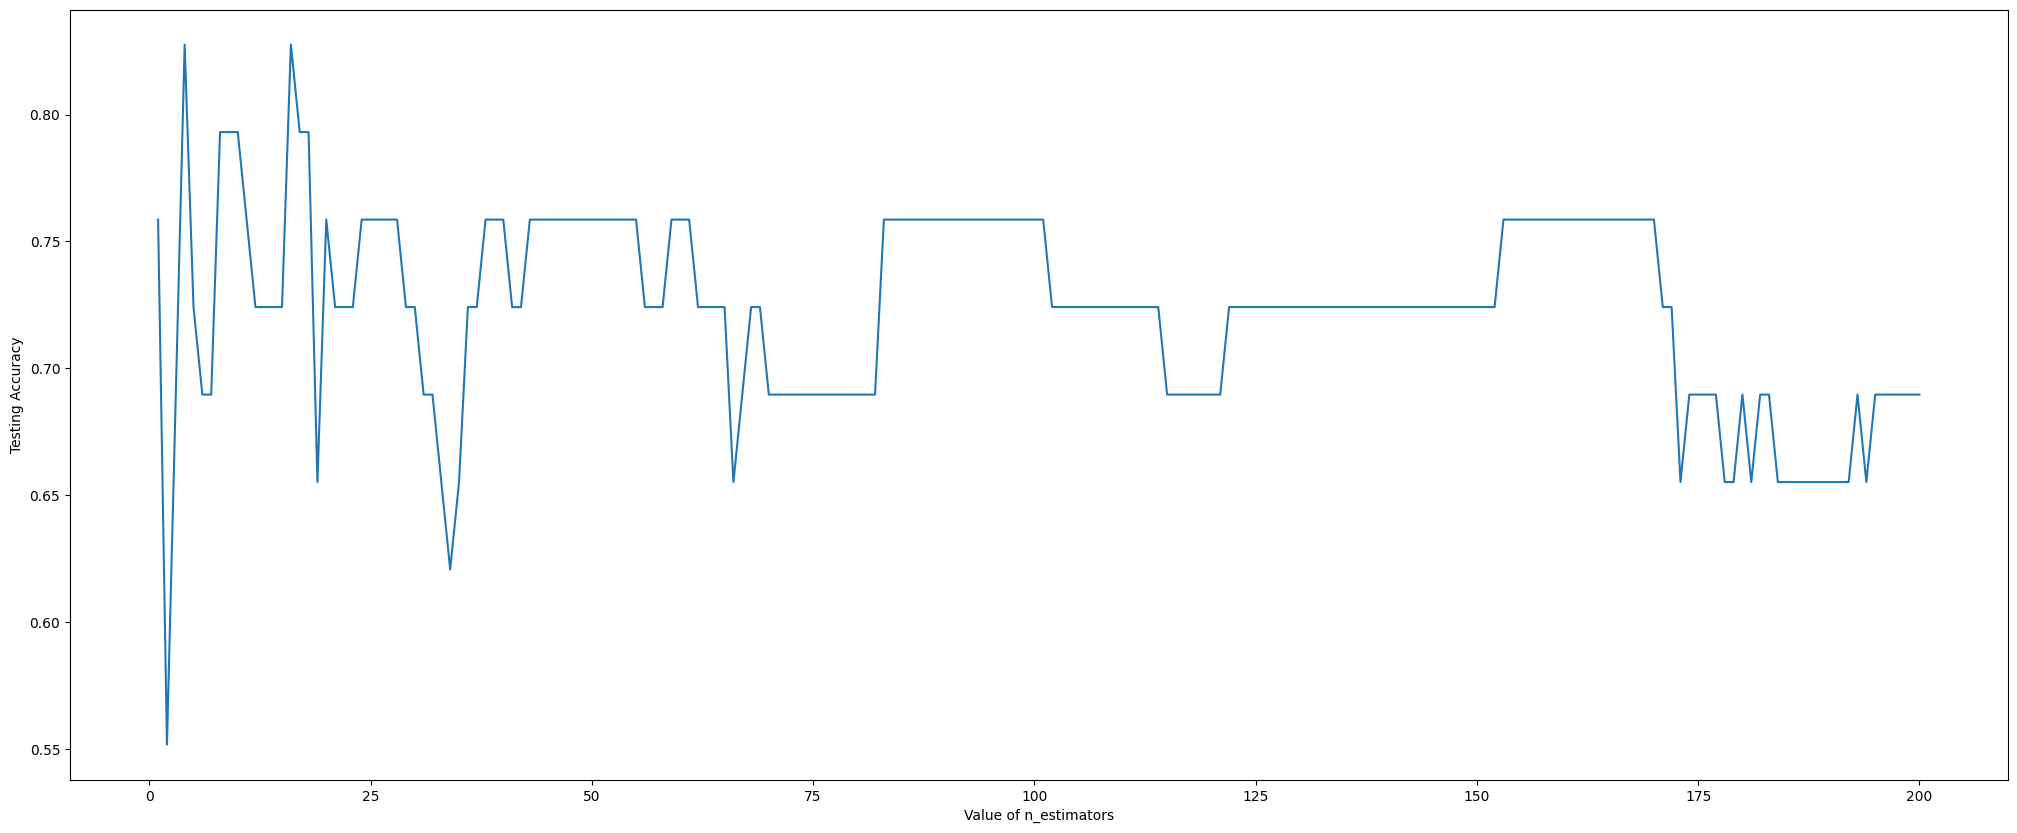

In [63]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [64]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[12  4]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.75      0.92      0.83        13

    accuracy                           0.83        29
   macro avg       0.84      0.84      0.83        29
weighted avg       0.85      0.83      0.83        29

Accurecy:  0.8275862068965517




---



---



#Graddient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13  3]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.77      0.77      0.77        13

    accuracy                           0.79        29
   macro avg       0.79      0.79      0.79        29
weighted avg       0.79      0.79      0.79        29

Accurecy:  0.7931034482758621


1/150 round completed......................... Accurecy: 0.8275862068965517
2/150 round completed......................... Accurecy: 0.8275862068965517
3/150 round completed......................... Accurecy: 0.7931034482758621
4/150 round completed......................... Accurecy: 0.8275862068965517
5/150 round completed......................... Accurecy: 0.7931034482758621
6/150 round completed......................... Accurecy: 0.7931034482758621
7/150 round completed......................... Accurecy: 0.8275862068965517
8/150 round completed......................... Accurecy: 0.8620689655172413
9/150 round completed......................... Accurecy: 0.7931034482758621
10/150 round completed......................... Accurecy: 0.8275862068965517
11/150 round completed......................... Accurecy: 0.8275862068965517
12/150 round completed......................... Accurecy: 0.8275862068965517
13/150 round completed......................... Accurecy: 0.8275862068965517
14/150 r

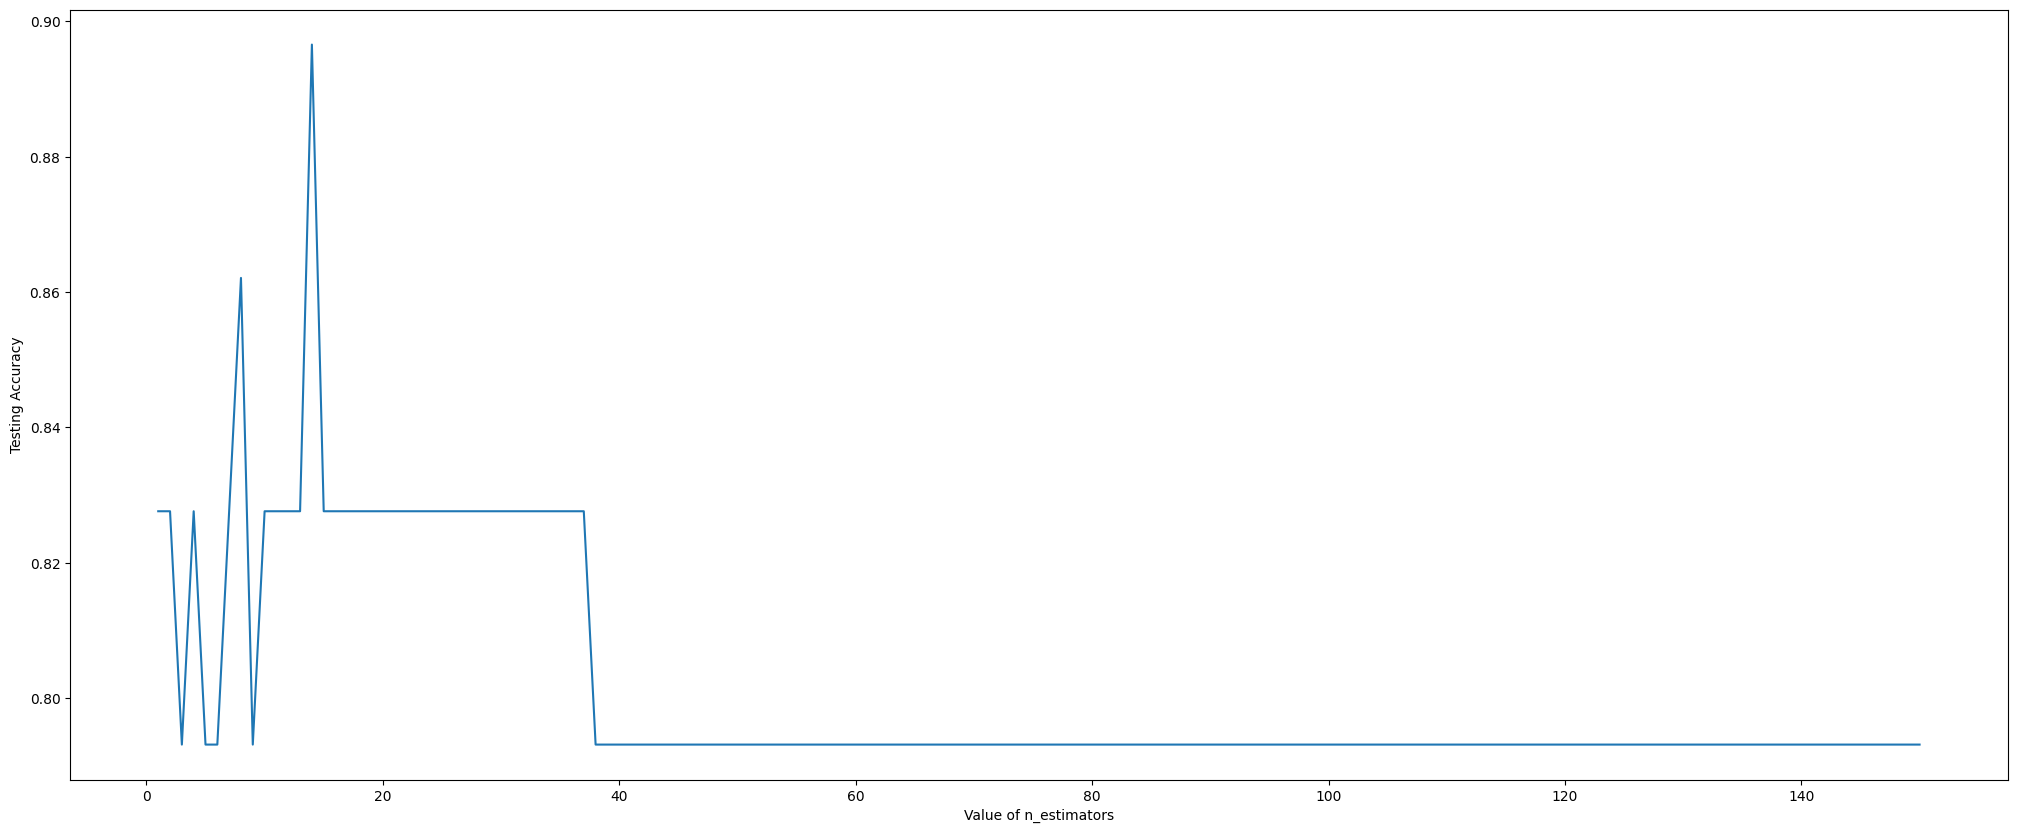

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.7931034482758621
2/30 round completed......................... Accurecy: 0.7586206896551724
3/30 round completed......................... Accurecy: 0.7931034482758621
4/30 round completed......................... Accurecy: 0.8275862068965517
5/30 round completed......................... Accurecy: 0.8275862068965517
6/30 round completed......................... Accurecy: 0.8275862068965517
7/30 round completed......................... Accurecy: 0.6551724137931034
8/30 round completed......................... Accurecy: 0.6206896551724138
9/30 round completed......................... Accurecy: 0.6551724137931034
10/30 round completed......................... Accurecy: 0.6551724137931034
11/30 round completed......................... Accurecy: 0.6551724137931034
12/30 round completed......................... Accurecy: 0.6551724137931034
13/30 round completed......................... Accurecy: 0.6551724137931034
14/30 round completed

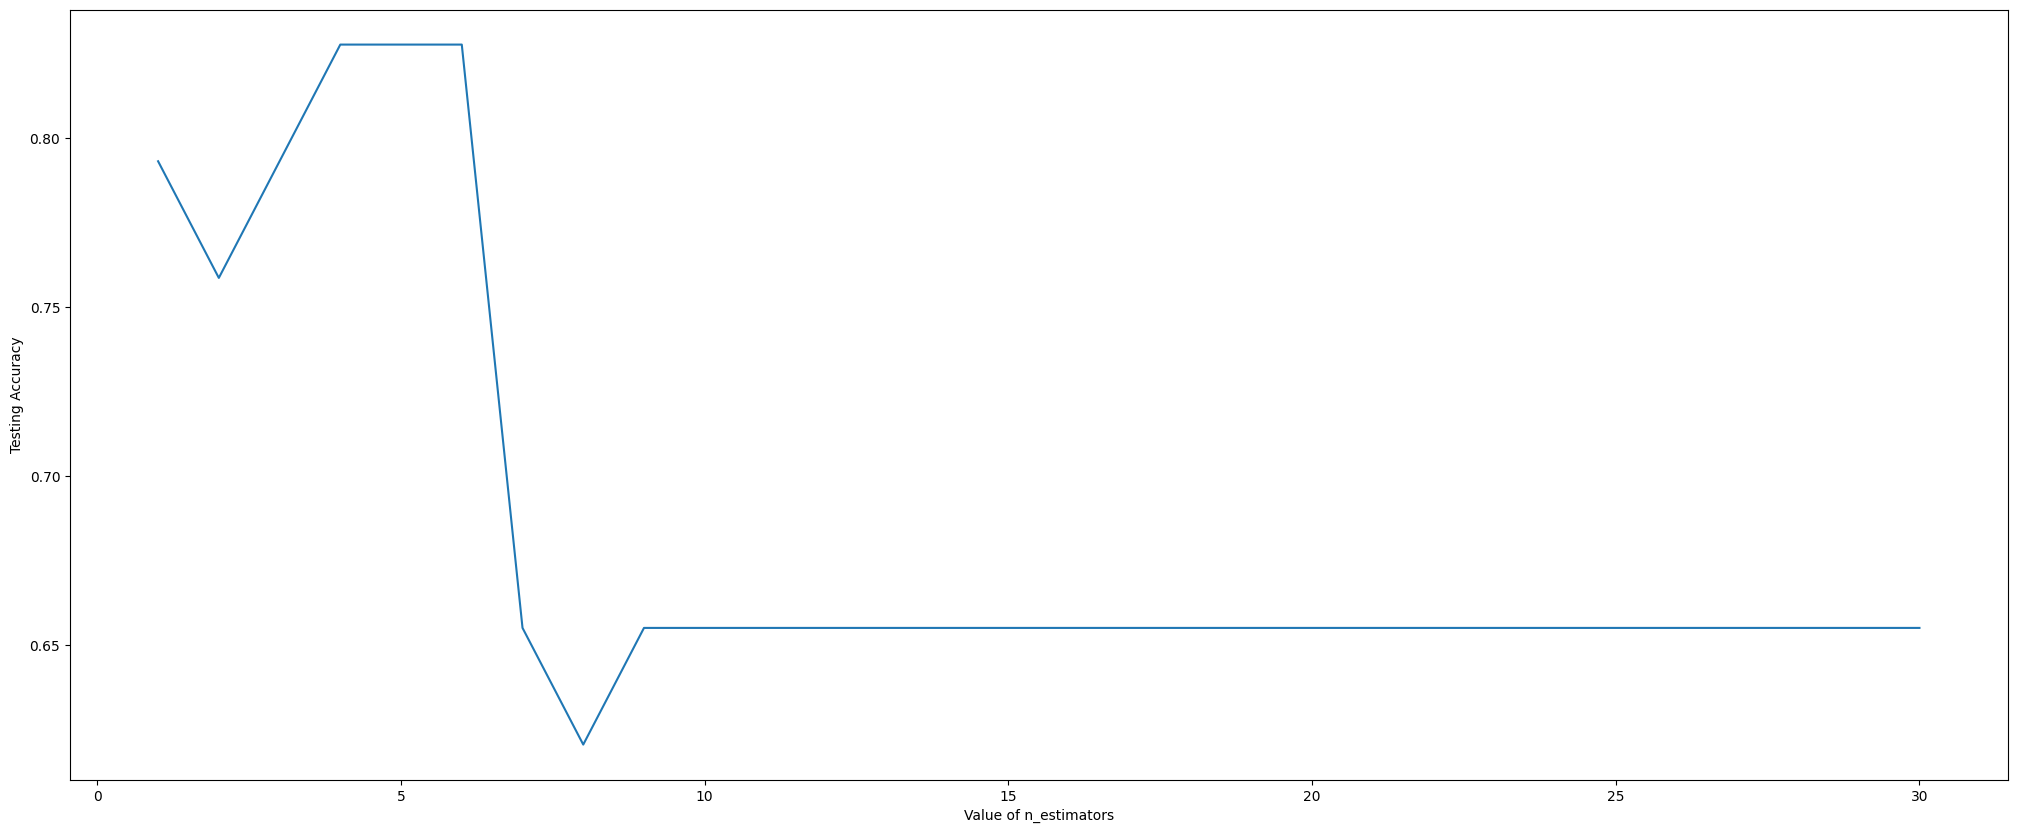

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[15  1]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.92      0.85      0.88        13

    accuracy                           0.90        29
   macro avg       0.90      0.89      0.89        29
weighted avg       0.90      0.90      0.90        29

Accurecy:  0.896551724137931


In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13  3]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.79      0.85      0.81        13

    accuracy                           0.83        29
   macro avg       0.83      0.83      0.83        29
weighted avg       0.83      0.83      0.83        29

Accurecy:  0.8275862068965517


In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13  3]
 [ 4  9]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.75      0.69      0.72        13

    accuracy                           0.76        29
   macro avg       0.76      0.75      0.75        29
weighted avg       0.76      0.76      0.76        29

Accurecy:  0.7586206896551724




---



---



#Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[14  2]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.83      0.77      0.80        13

    accuracy                           0.83        29
   macro avg       0.83      0.82      0.82        29
weighted avg       0.83      0.83      0.83        29

Accurecy:  0.8275862068965517


1/150 round completed......................... Accurecy: 0.7241379310344828
2/150 round completed......................... Accurecy: 0.7241379310344828
3/150 round completed......................... Accurecy: 0.6551724137931034
4/150 round completed......................... Accurecy: 0.7586206896551724
5/150 round completed......................... Accurecy: 0.7241379310344828
6/150 round completed......................... Accurecy: 0.8620689655172413
7/150 round completed......................... Accurecy: 0.7586206896551724
8/150 round completed......................... Accurecy: 0.7931034482758621
9/150 round completed......................... Accurecy: 0.8275862068965517
10/150 round completed......................... Accurecy: 0.7586206896551724
11/150 round completed......................... Accurecy: 0.8275862068965517
12/150 round completed......................... Accurecy: 0.7931034482758621
13/150 round completed......................... Accurecy: 0.7586206896551724
14/150 r

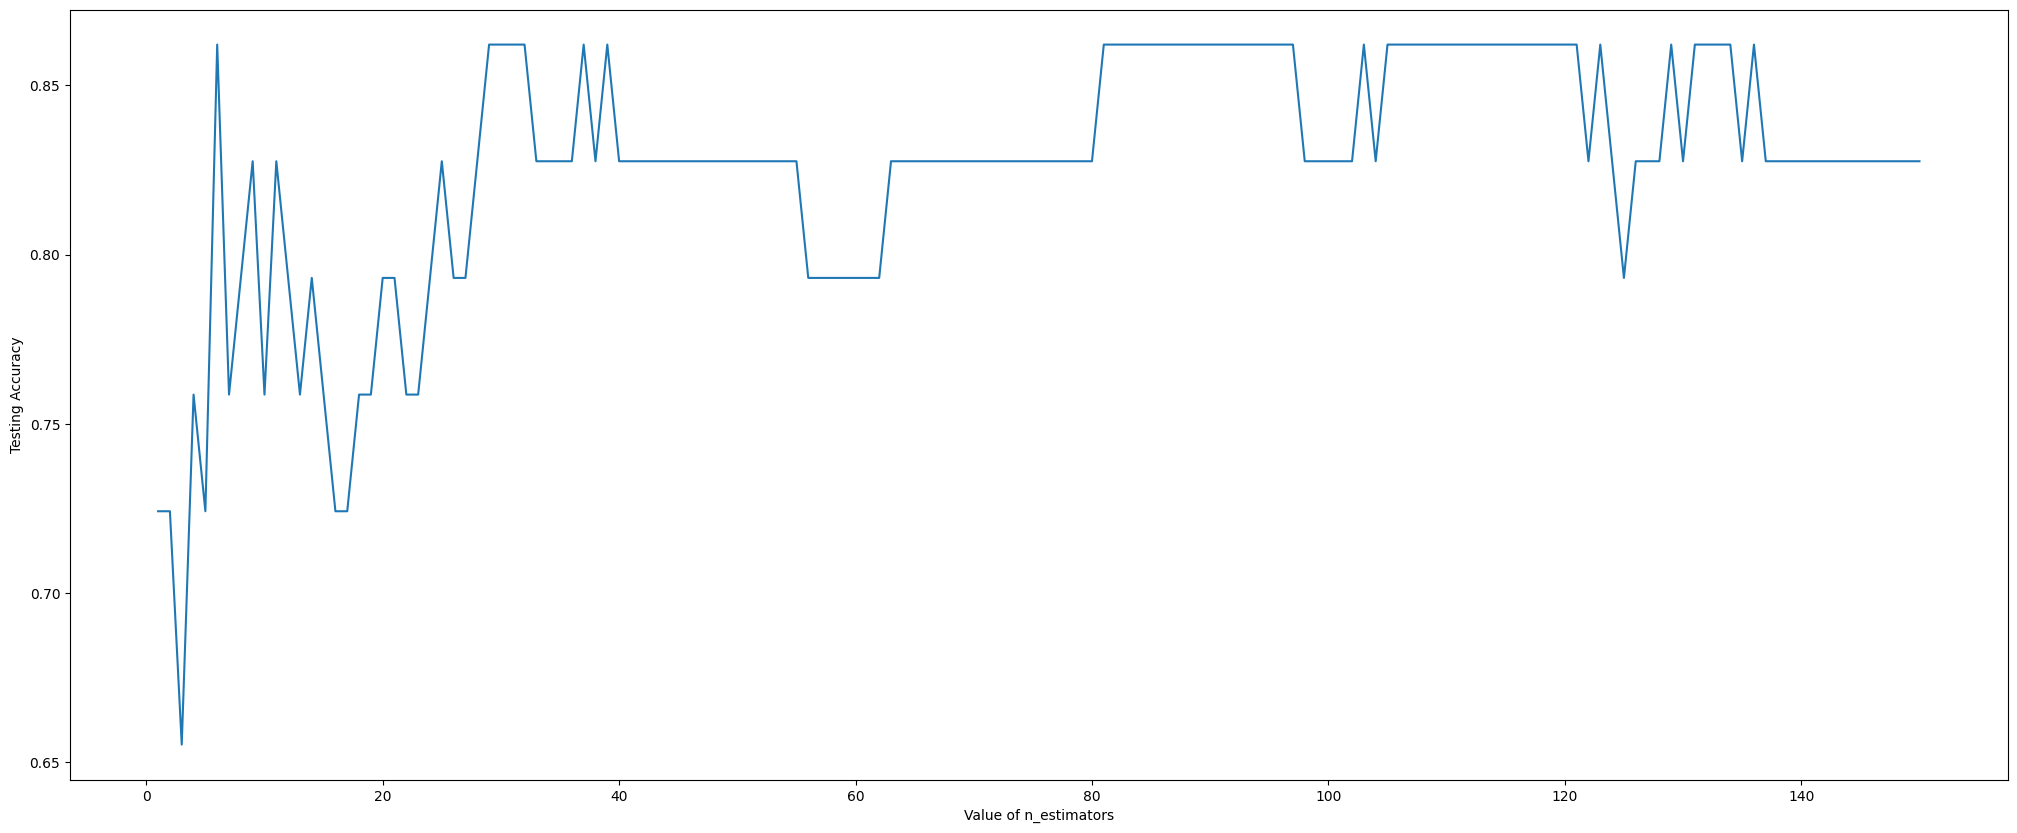

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.7241379310344828
2/150 round completed......................... Accurecy: 0.7586206896551724
3/150 round completed......................... Accurecy: 0.8275862068965517
4/150 round completed......................... Accurecy: 0.7586206896551724
5/150 round completed......................... Accurecy: 0.8275862068965517
6/150 round completed......................... Accurecy: 0.8275862068965517
7/150 round completed......................... Accurecy: 0.7931034482758621
8/150 round completed......................... Accurecy: 0.8620689655172413
9/150 round completed......................... Accurecy: 0.8620689655172413
10/150 round completed......................... Accurecy: 0.8275862068965517
11/150 round completed......................... Accurecy: 0.8620689655172413
12/150 round completed......................... Accurecy: 0.8275862068965517
13/150 round completed......................... Accurecy: 0.8275862068965517
14/150 r

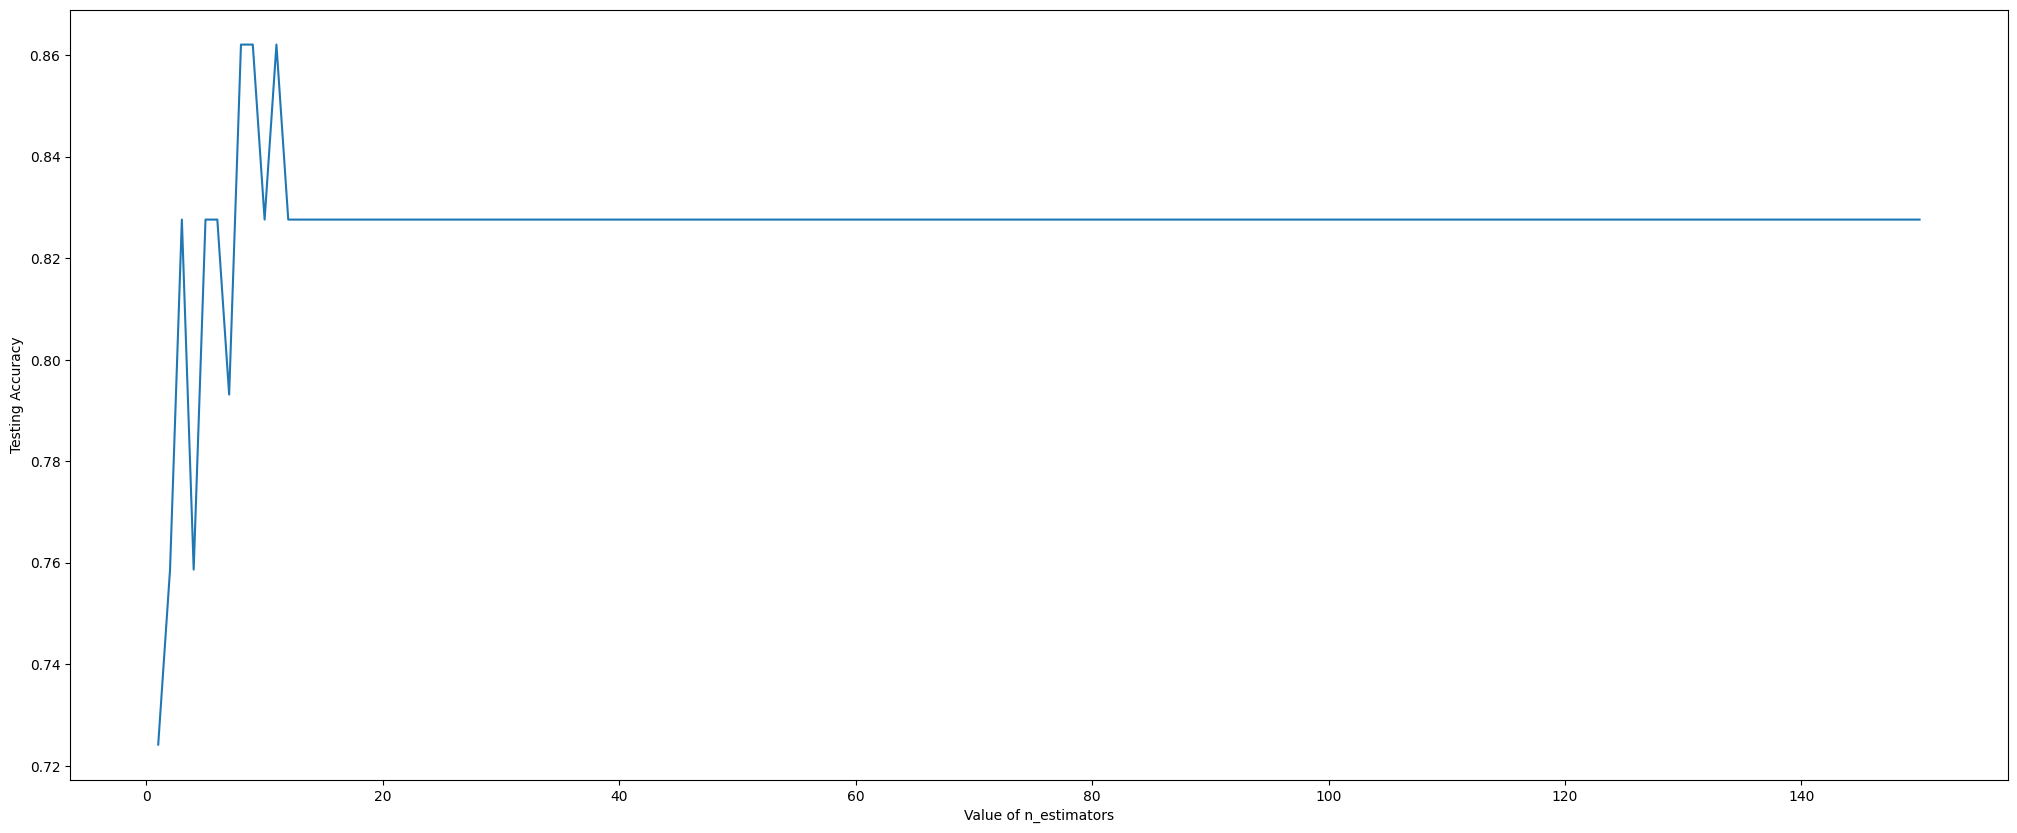

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[14  2]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.85      0.85      0.85        13

    accuracy                           0.86        29
   macro avg       0.86      0.86      0.86        29
weighted avg       0.86      0.86      0.86        29

Accurecy:  0.8620689655172413


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[14  2]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.85      0.85      0.85        13

    accuracy                           0.86        29
   macro avg       0.86      0.86      0.86        29
weighted avg       0.86      0.86      0.86        29

Accurecy:  0.8620689655172413


In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[13  3]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.79      0.85      0.81        13

    accuracy                           0.83        29
   macro avg       0.83      0.83      0.83        29
weighted avg       0.83      0.83      0.83        29

Accurecy:  0.8275862068965517




---



---



#XGB

In [77]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[13  3]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.79      0.85      0.81        13

    accuracy                           0.83        29
   macro avg       0.83      0.83      0.83        29
weighted avg       0.83      0.83      0.83        29

Accurecy:  0.8275862068965517


1/250 round completed......................... Accurecy: 0.6896551724137931
2/250 round completed......................... Accurecy: 0.7241379310344828
3/250 round completed......................... Accurecy: 0.7931034482758621
4/250 round completed......................... Accurecy: 0.7586206896551724
5/250 round completed......................... Accurecy: 0.7931034482758621
6/250 round completed......................... Accurecy: 0.8275862068965517
7/250 round completed......................... Accurecy: 0.8275862068965517
8/250 round completed......................... Accurecy: 0.7931034482758621
9/250 round completed......................... Accurecy: 0.8275862068965517
10/250 round completed......................... Accurecy: 0.7931034482758621
11/250 round completed......................... Accurecy: 0.7931034482758621
12/250 round completed......................... Accurecy: 0.8275862068965517
13/250 round completed......................... Accurecy: 0.8275862068965517
14/250 r

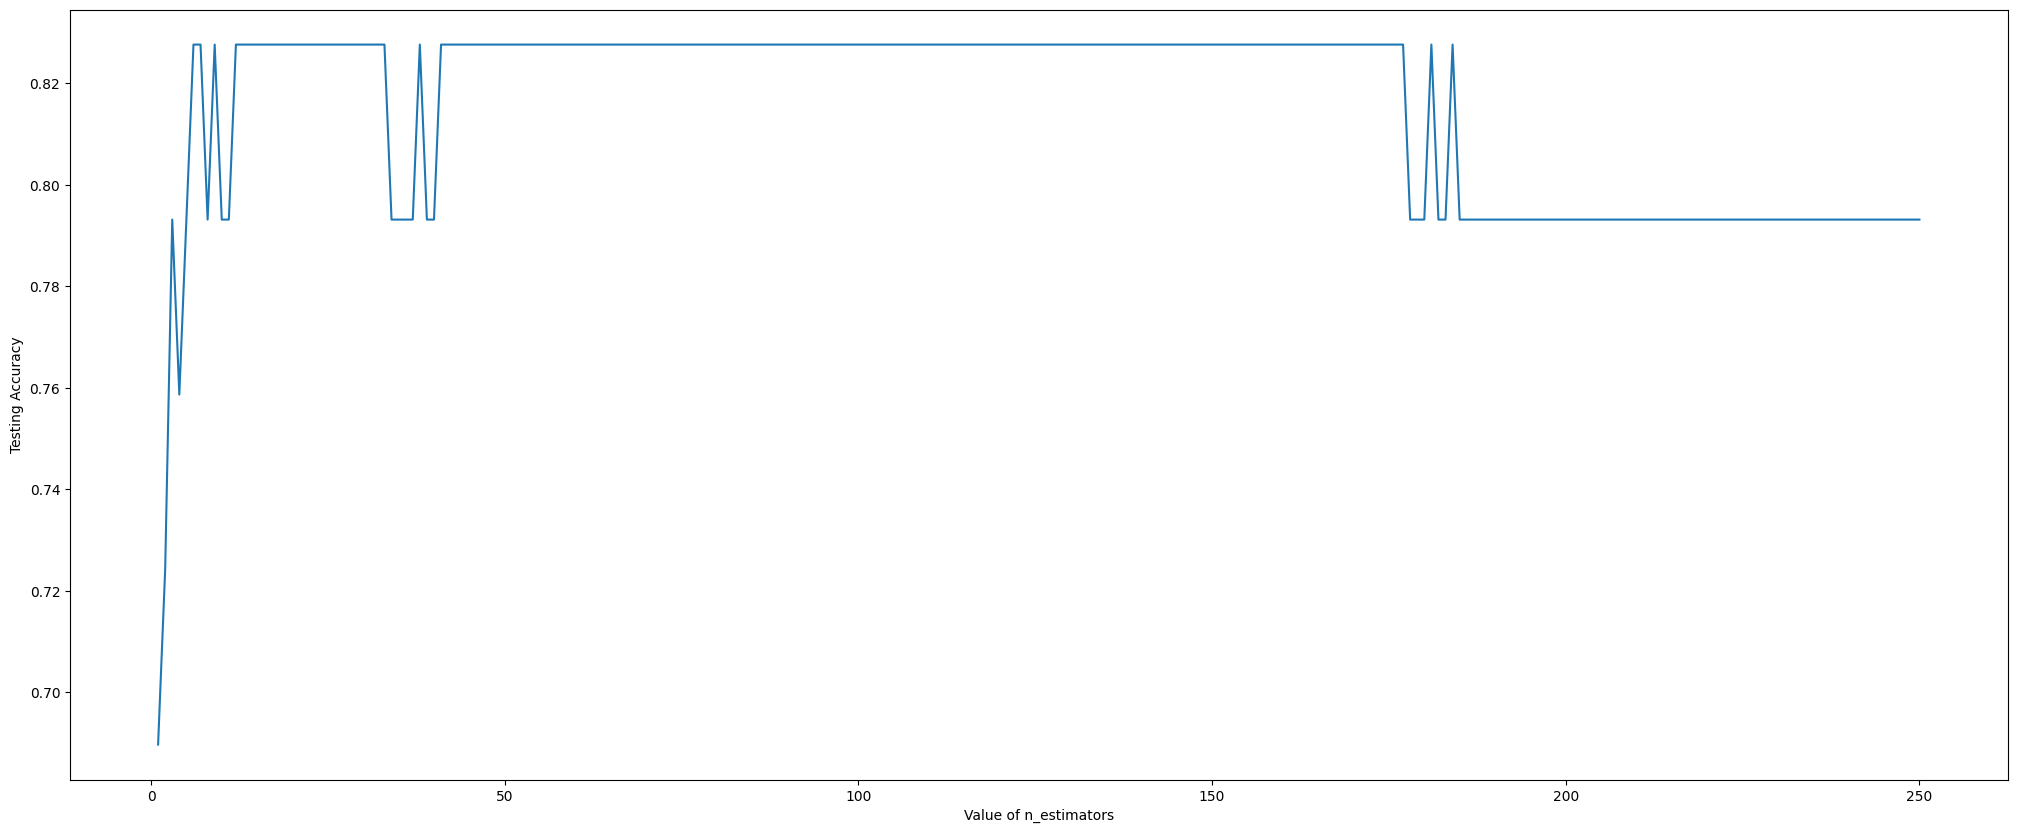

In [78]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.7241379310344828
2/250 round completed......................... Accurecy: 0.7586206896551724
3/250 round completed......................... Accurecy: 0.8275862068965517
4/250 round completed......................... Accurecy: 0.7931034482758621
5/250 round completed......................... Accurecy: 0.7931034482758621
6/250 round completed......................... Accurecy: 0.8275862068965517
7/250 round completed......................... Accurecy: 0.7931034482758621
8/250 round completed......................... Accurecy: 0.7931034482758621
9/250 round completed......................... Accurecy: 0.7931034482758621
10/250 round completed......................... Accurecy: 0.7931034482758621
11/250 round completed......................... Accurecy: 0.7931034482758621
12/250 round completed......................... Accurecy: 0.7931034482758621
13/250 round completed......................... Accurecy: 0.7931034482758621
14/250 r

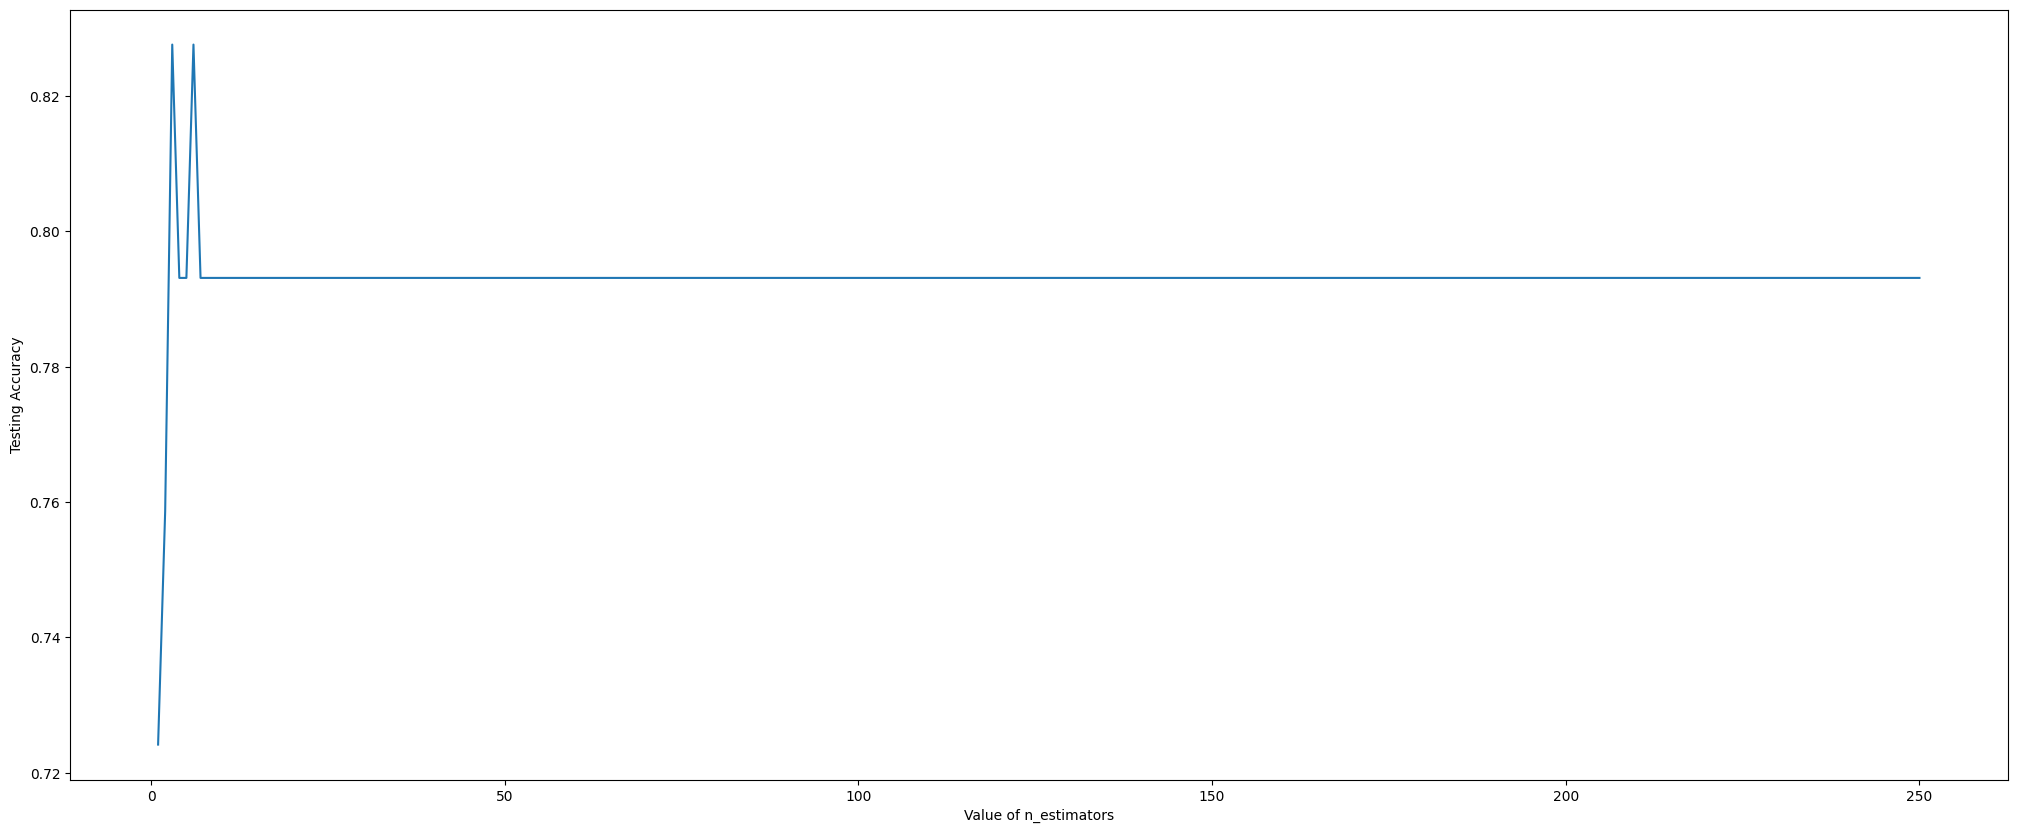

In [79]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [80]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[13  3]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.79      0.85      0.81        13

    accuracy                           0.83        29
   macro avg       0.83      0.83      0.83        29
weighted avg       0.83      0.83      0.83        29

Accurecy:  0.8275862068965517
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None

In [81]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[14  2]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.83      0.77      0.80        13

    accuracy                           0.83        29
   macro avg       0.83      0.82      0.82        29
weighted avg       0.83      0.83      0.83        29

Accurecy:  0.8275862068965517
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=N

In [82]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[13  3]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.79      0.85      0.81        13

    accuracy                           0.83        29
   macro avg       0.83      0.83      0.83        29
weighted avg       0.83      0.83      0.83        29

Accurecy:  0.8275862068965517


#KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[12  4]
 [ 5  8]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.67      0.62      0.64        13

    accuracy                           0.69        29
   macro avg       0.69      0.68      0.68        29
weighted avg       0.69      0.69      0.69        29

Accurecy:  0.6896551724137931


1/105 round completed......................... Accurecy: 0.5862068965517241
2/105 round completed......................... Accurecy: 0.6551724137931034
3/105 round completed......................... Accurecy: 0.5862068965517241
4/105 round completed......................... Accurecy: 0.6206896551724138
5/105 round completed......................... Accurecy: 0.6896551724137931
6/105 round completed......................... Accurecy: 0.5862068965517241
7/105 round completed......................... Accurecy: 0.5862068965517241
8/105 round completed......................... Accurecy: 0.5862068965517241
9/105 round completed......................... Accurecy: 0.5862068965517241
10/105 round completed......................... Accurecy: 0.4827586206896552
11/105 round completed......................... Accurecy: 0.4827586206896552
12/105 round completed......................... Accurecy: 0.5172413793103449
13/105 round completed......................... Accurecy: 0.5172413793103449
14/105 r

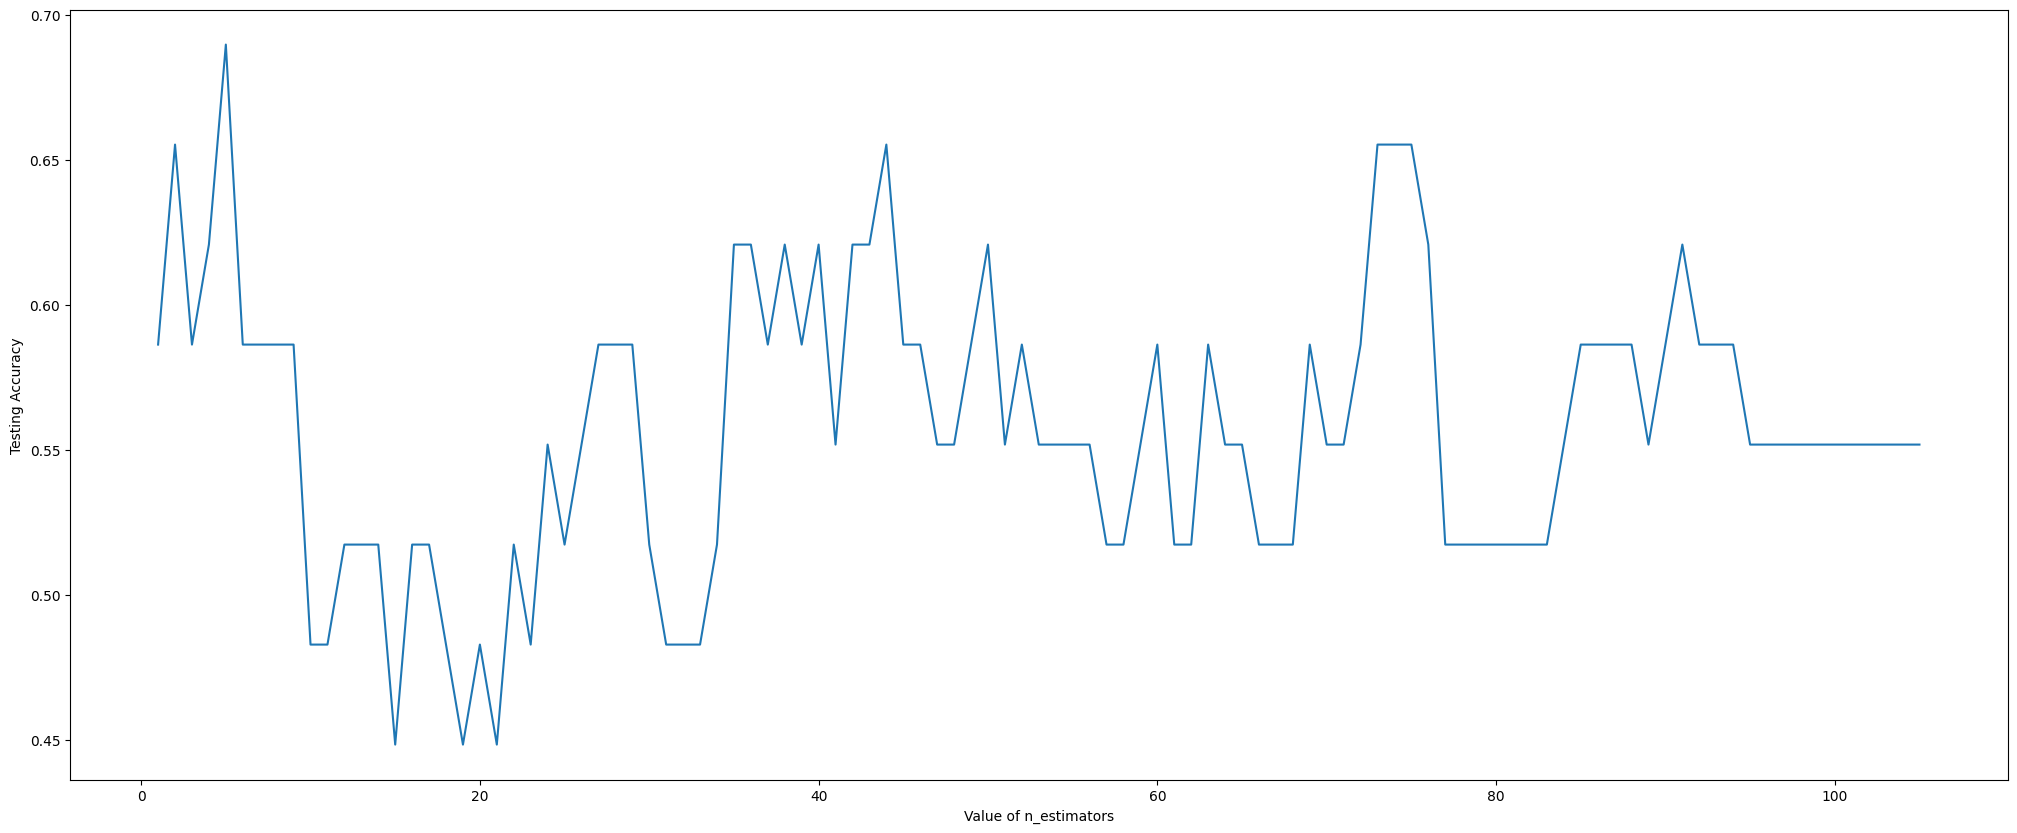

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[12  4]
 [ 5  8]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.67      0.62      0.64        13

    accuracy                           0.69        29
   macro avg       0.69      0.68      0.68        29
weighted avg       0.69      0.69      0.69        29

Accurecy:  0.6896551724137931


#NB

In [86]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[12  4]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.71      0.77      0.74        13

    accuracy                           0.76        29
   macro avg       0.76      0.76      0.76        29
weighted avg       0.76      0.76      0.76        29

Accurecy:  0.7586206896551724


#Histogram-Based Gradient Boosting

In [87]:
from sklearn.ensemble import HistGradientBoostingClassifier

hisgradBoost_default = HistGradientBoostingClassifier(random_state=0)
hisgradBoost_default.fit(X_train, y_train)
y_pred = hisgradBoost_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_default,7,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)


[[12  4]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.73      0.85      0.79        13

    accuracy                           0.79        29
   macro avg       0.80      0.80      0.79        29
weighted avg       0.80      0.79      0.79        29

Accurecy:  0.7931034482758621


100/1000 round completed......................... Accurecy: 0.7931034482758621
200/1000 round completed......................... Accurecy: 0.7931034482758621
300/1000 round completed......................... Accurecy: 0.7931034482758621
400/1000 round completed......................... Accurecy: 0.7931034482758621
500/1000 round completed......................... Accurecy: 0.7931034482758621
600/1000 round completed......................... Accurecy: 0.7931034482758621
700/1000 round completed......................... Accurecy: 0.7931034482758621
800/1000 round completed......................... Accurecy: 0.7931034482758621
900/1000 round completed......................... Accurecy: 0.7931034482758621
1000/1000 round completed......................... Accurecy: 0.7931034482758621
The best max_iter:
100


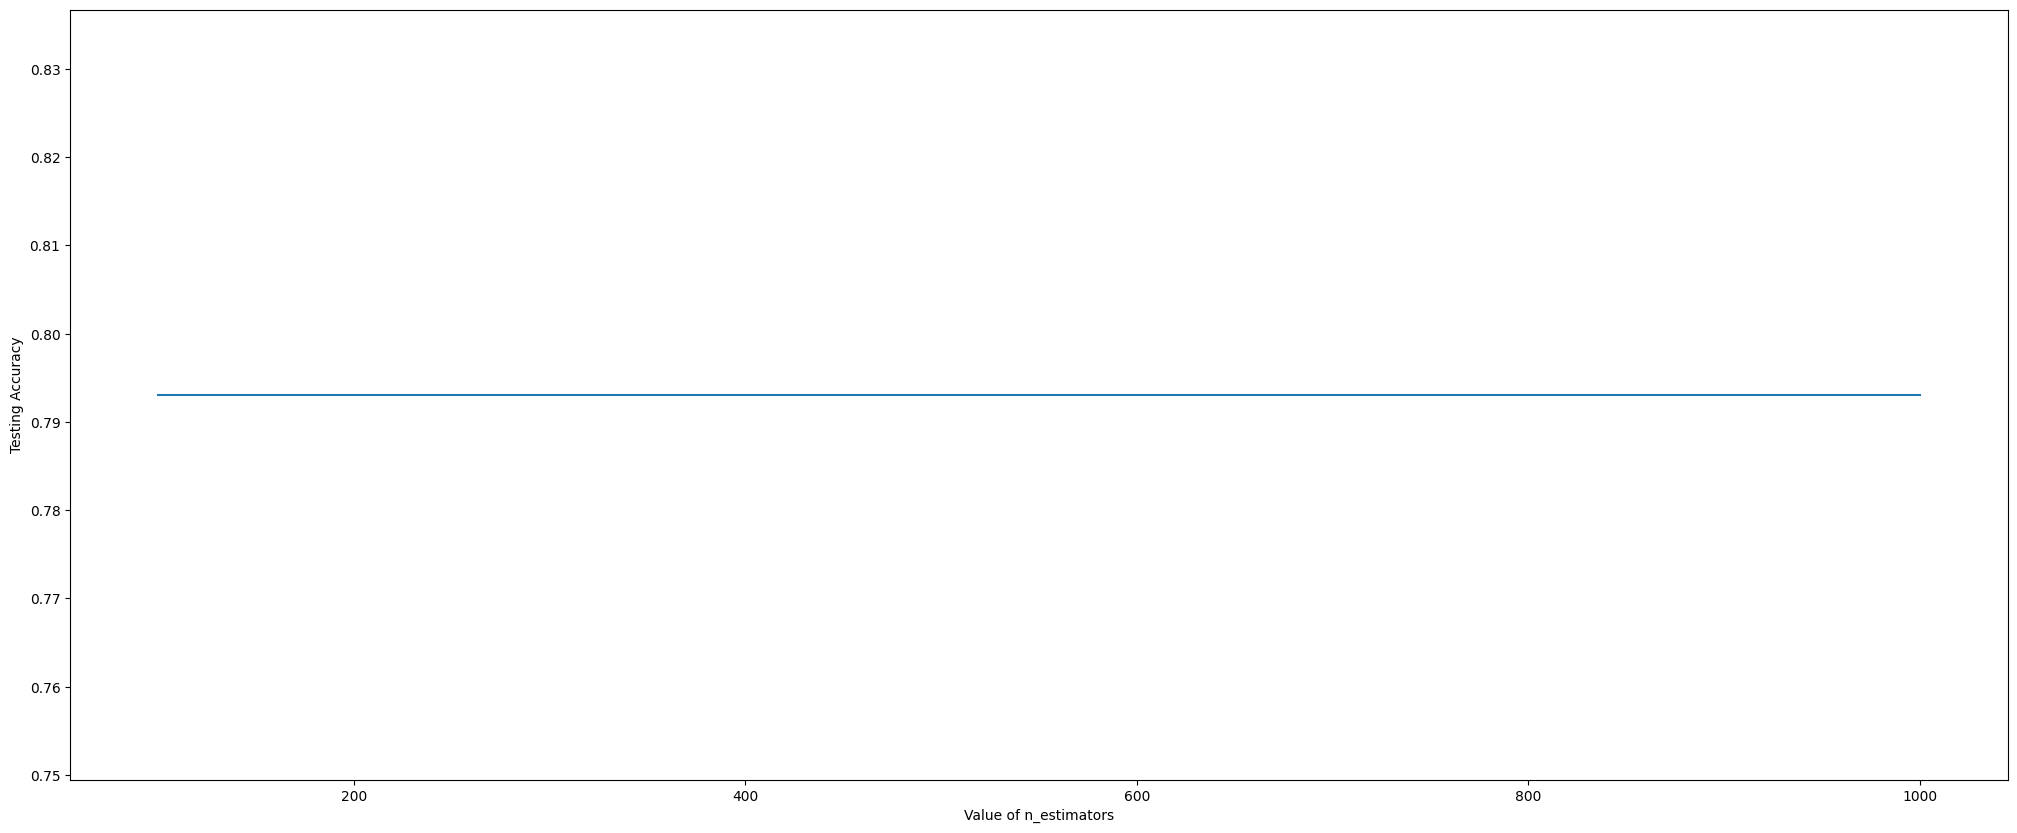

In [88]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=1000
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_iter:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/50 round completed......................... Accurecy: 0.7586206896551724
2/50 round completed......................... Accurecy: 0.7586206896551724
3/50 round completed......................... Accurecy: 0.7931034482758621
4/50 round completed......................... Accurecy: 0.7586206896551724
5/50 round completed......................... Accurecy: 0.8275862068965517
6/50 round completed......................... Accurecy: 0.7931034482758621
7/50 round completed......................... Accurecy: 0.7931034482758621
8/50 round completed......................... Accurecy: 0.7931034482758621
9/50 round completed......................... Accurecy: 0.7931034482758621
10/50 round completed......................... Accurecy: 0.7931034482758621
11/50 round completed......................... Accurecy: 0.7931034482758621
12/50 round completed......................... Accurecy: 0.7931034482758621
13/50 round completed......................... Accurecy: 0.7931034482758621
14/50 round completed

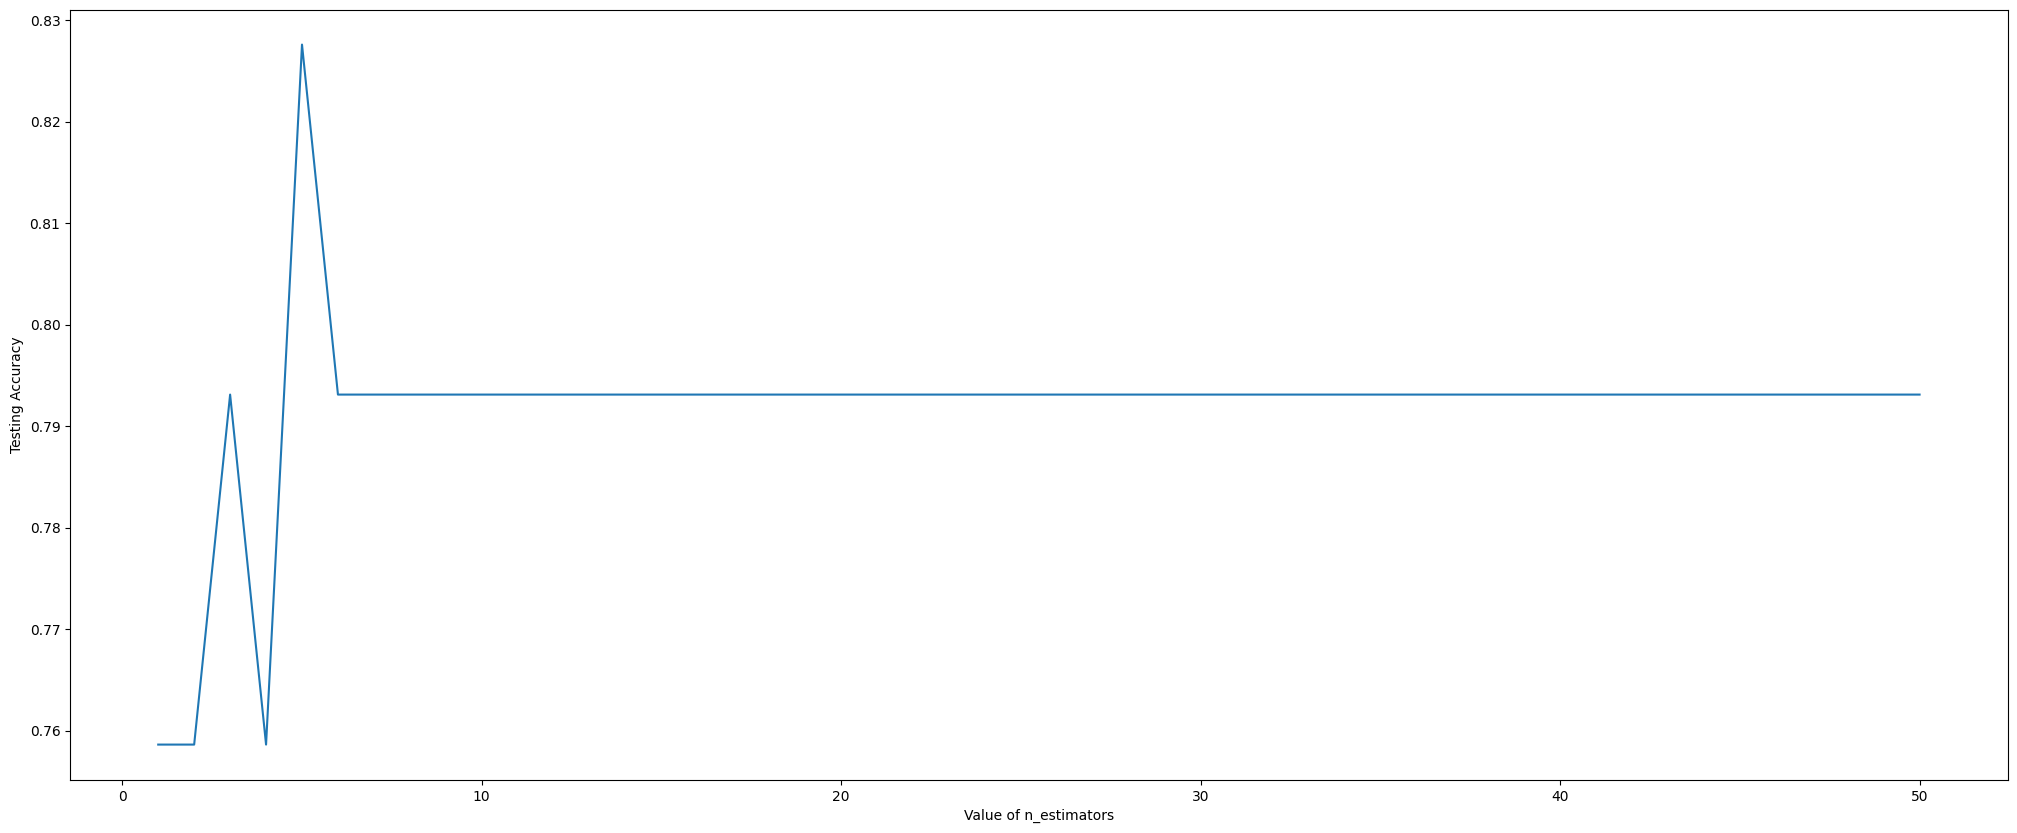

In [89]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_depth:")
max_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(max_depth)

In [90]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_iter = HistGradientBoostingClassifier(max_iter=best_estimator,random_state=0)
hisgradBoost_max_iter.fit(X_train, y_train)
y_pred = hisgradBoost_max_iter.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_iter,8,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  4]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.73      0.85      0.79        13

    accuracy                           0.79        29
   macro avg       0.80      0.80      0.79        29
weighted avg       0.80      0.79      0.79        29

Accurecy:  0.7931034482758621


In [91]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_depth = HistGradientBoostingClassifier(max_depth=max_depth,random_state=0)
hisgradBoost_max_depth.fit(X_train, y_train)
y_pred = hisgradBoost_max_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_depth,9,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13  3]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.79      0.85      0.81        13

    accuracy                           0.83        29
   macro avg       0.83      0.83      0.83        29
weighted avg       0.83      0.83      0.83        29

Accurecy:  0.8275862068965517


In [92]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=max_depth,random_state=0)
hisgradBoost_all.fit(X_train, y_train)
y_pred = hisgradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_all,10,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13  3]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.79      0.85      0.81        13

    accuracy                           0.83        29
   macro avg       0.83      0.83      0.83        29
weighted avg       0.83      0.83      0.83        29

Accurecy:  0.8275862068965517


#Result

In [93]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()

AdaBoostClassifier(random_state=0) 1  :  0.7586206896551724
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=4, random_state=0) 1  :  0.8275862068965517
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.7931034482758621
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=14, random_state=0) 2  :  0.896551724137931
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=4, random_state=0) 2  :  0.8275862068965517
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=4, n_estimators=14, random_state=0) 2  :  0.7586206896551724
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.8275862068965517
---------------------------------------------------------------

RandomForestCl

In [94]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(GradientBoostingClassifier(n_estimators=14, random_state=0), 2, 'GradientBoostingClassifier')   :  0.896551724137931
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(n_estimators=6, random_state=0), 3, 'RandomForestClassifier')   :  0.8620689655172413
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(max_depth=8, random_state=0), 3, 'RandomForestClassifier')   :  0.8620689655172413
-------------------------------------------------------------------------------------------------
(AdaBoostClassifier(n_estimators=4, random_state=0), 1, 'AdaBoostClassifier')   :  0.8275862068965517
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=4, random_state=0), 2, 'GradientBoostingClassifier')   :  0.8275862068965517
--------------------------------------------------------

In [95]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(GradientBoostingClassifier(n_estimators=14, random_state=0), 'GradientBoostingClassifier')
(RandomForestClassifier(n_estimators=6, random_state=0), 'RandomForestClassifier')
(AdaBoostClassifier(n_estimators=4, random_state=0), 'AdaBoostClassifier')
(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_s

In [96]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [97]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------
GradientBoostingClassifier(n_estimators=14, random_state=0)
[[15  1]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.92      0.85      0.88        13

    accuracy                           0.90        29
   macro avg       0.90      0.89      0.89        29
weighted avg       0.90      0.90      0.90        29

Accurecy:  0.896551724137931
--------------------------------------------------
RandomForestClassifier(n_estimators=6, random_state=0)
[[14  2]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.85      0.85      0.85        13

    accuracy                           0.86        29
   macro avg       0.86      0.86      0.86        29
weighted avg       0.86      0.86      0.86        29

Accurecy:  0.8620689655172413
--------------------------------

#SHAP

In [98]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.8 MB/s eta 0:00:00


In [99]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_train)

  shap_values1 = explainer(X_train)
  features_names=list_of_feat1

  if 'Subjects' in features_names:
    features_names.pop(0)

  print("Global Explaination")
  shap.plots.bar(shap_values1,max_display=30)

  print("Global Explaination")

  shap.summary_plot(shap_values1,max_display=30)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=25)


  print("Local Explaination")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=25)

**Model Check Box Function**

In [100]:

def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

In [101]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=14, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, n_estimators=14, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, n_estimators=6, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

Models:  GradientBoostingClassifier(n_estimators=14, random_state=0)


Permutation explainer: 204it [00:12,  3.51it/s]                         


Global Explaination


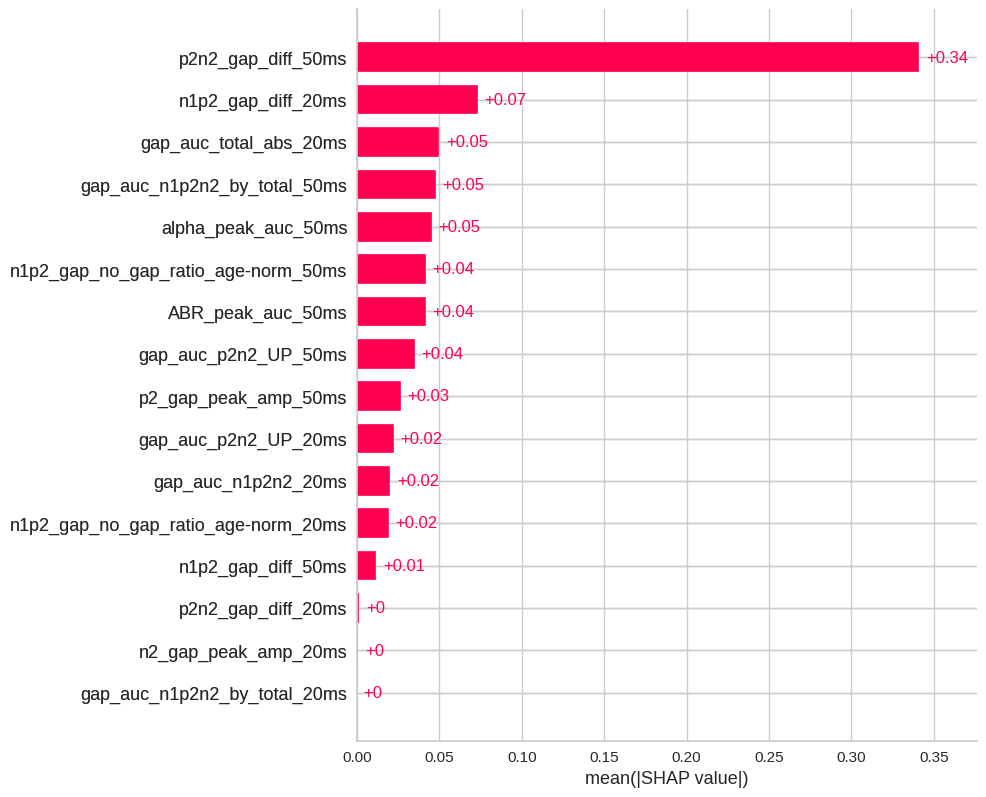

Global Explaination


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


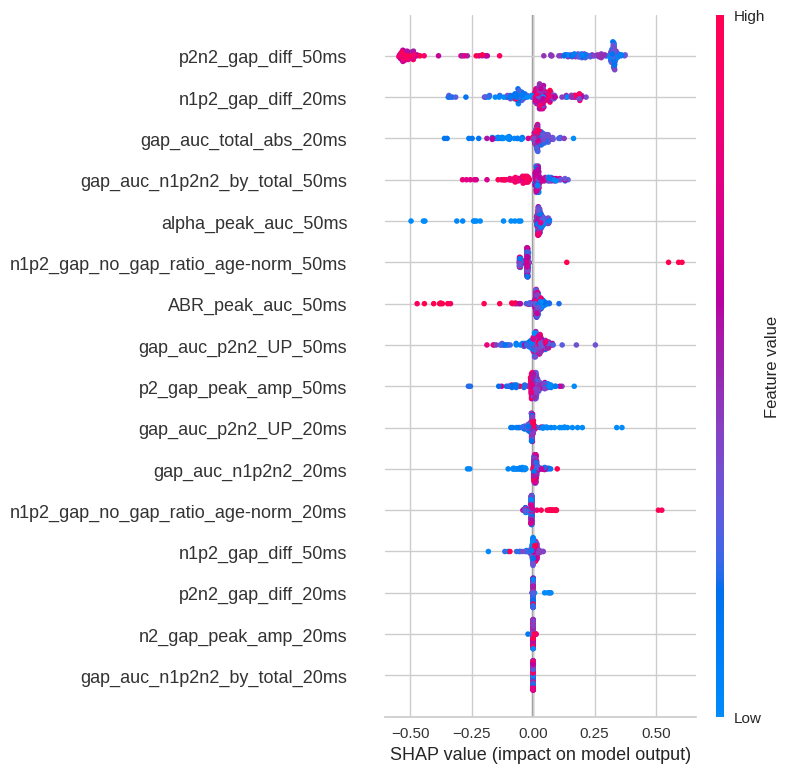

---------------------
Local Explaination


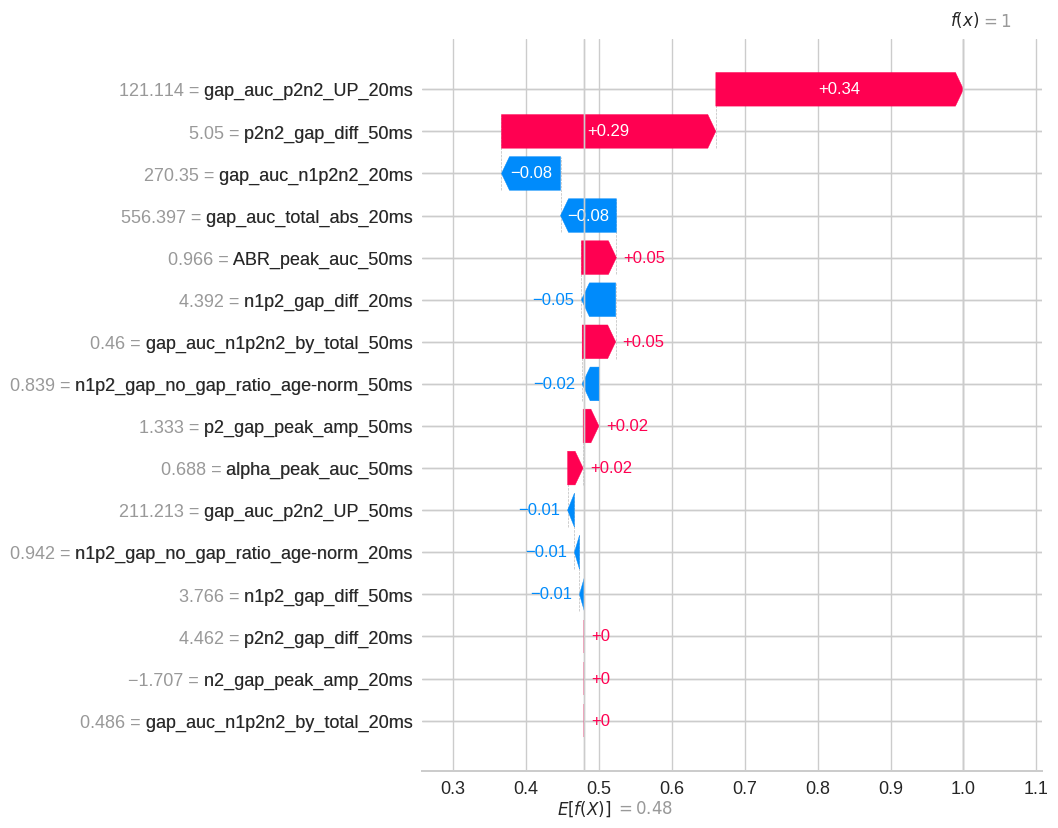

Local Explaination


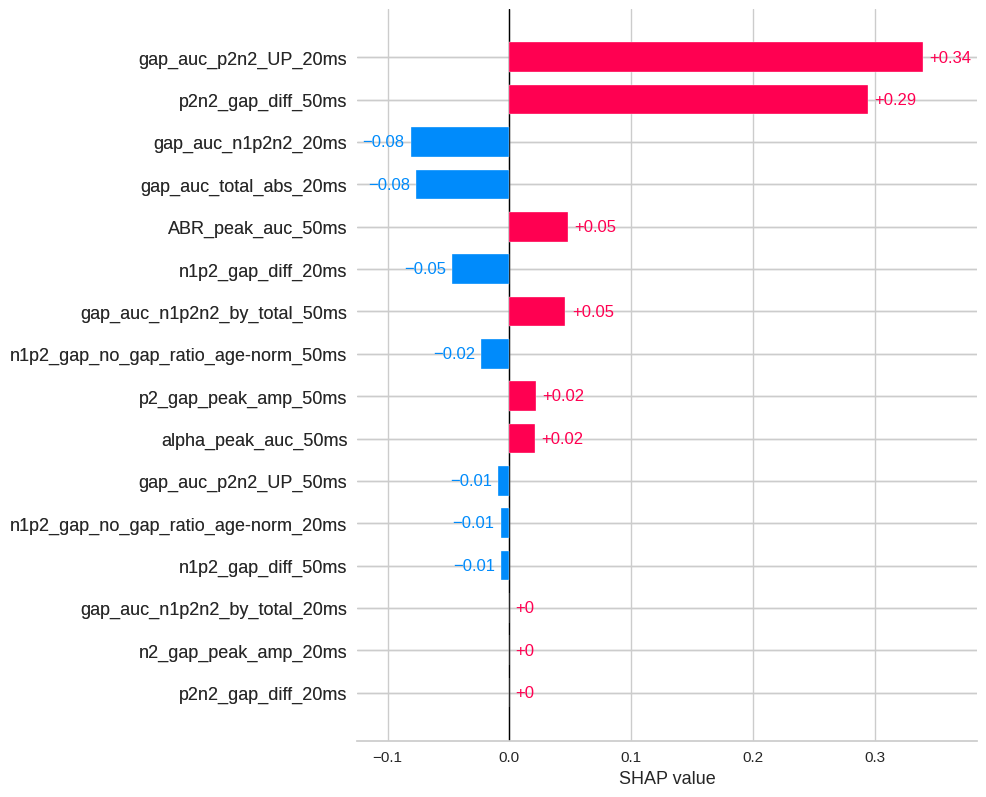

---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------


In [124]:
graph_feat={
    "max_display":30,
    "shap_values Index":10
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [103]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=14, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, n_estimators=14, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, n_estimators=6, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


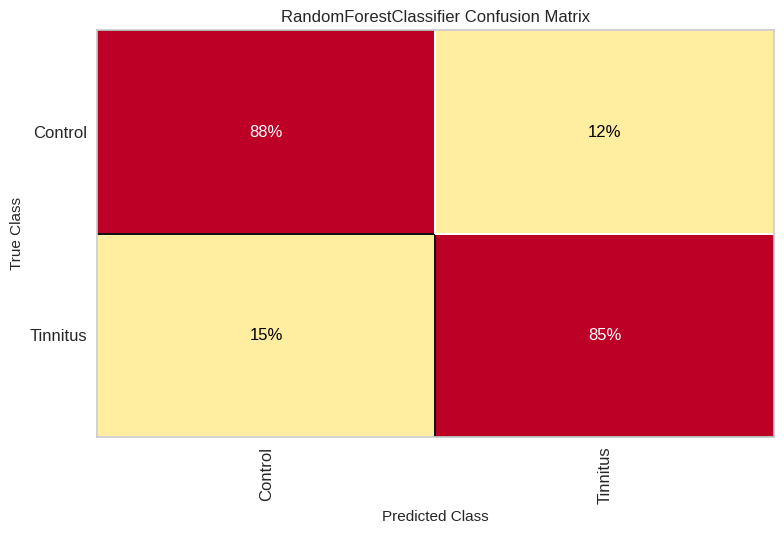

In [120]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes, percent=True)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#Confusion Matrix For Training

In [105]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=14, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, n_estimators=14, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, n_estimators=6, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

In [106]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [107]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Tinnitus'
  return my_list

In [108]:
new_keys_4=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=14, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, n_estimators=14, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, n_estimators=6, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

In [109]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")

#ROC Comparaing Machine Learning Models

In [110]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i])

  # Title
  plt.title('ROC Plot Testing',fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [111]:
new_keys_2=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=14, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, n_estimators=14, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, n_estimators=6, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)


Change  the given dictionary of graph feature for desire graph.

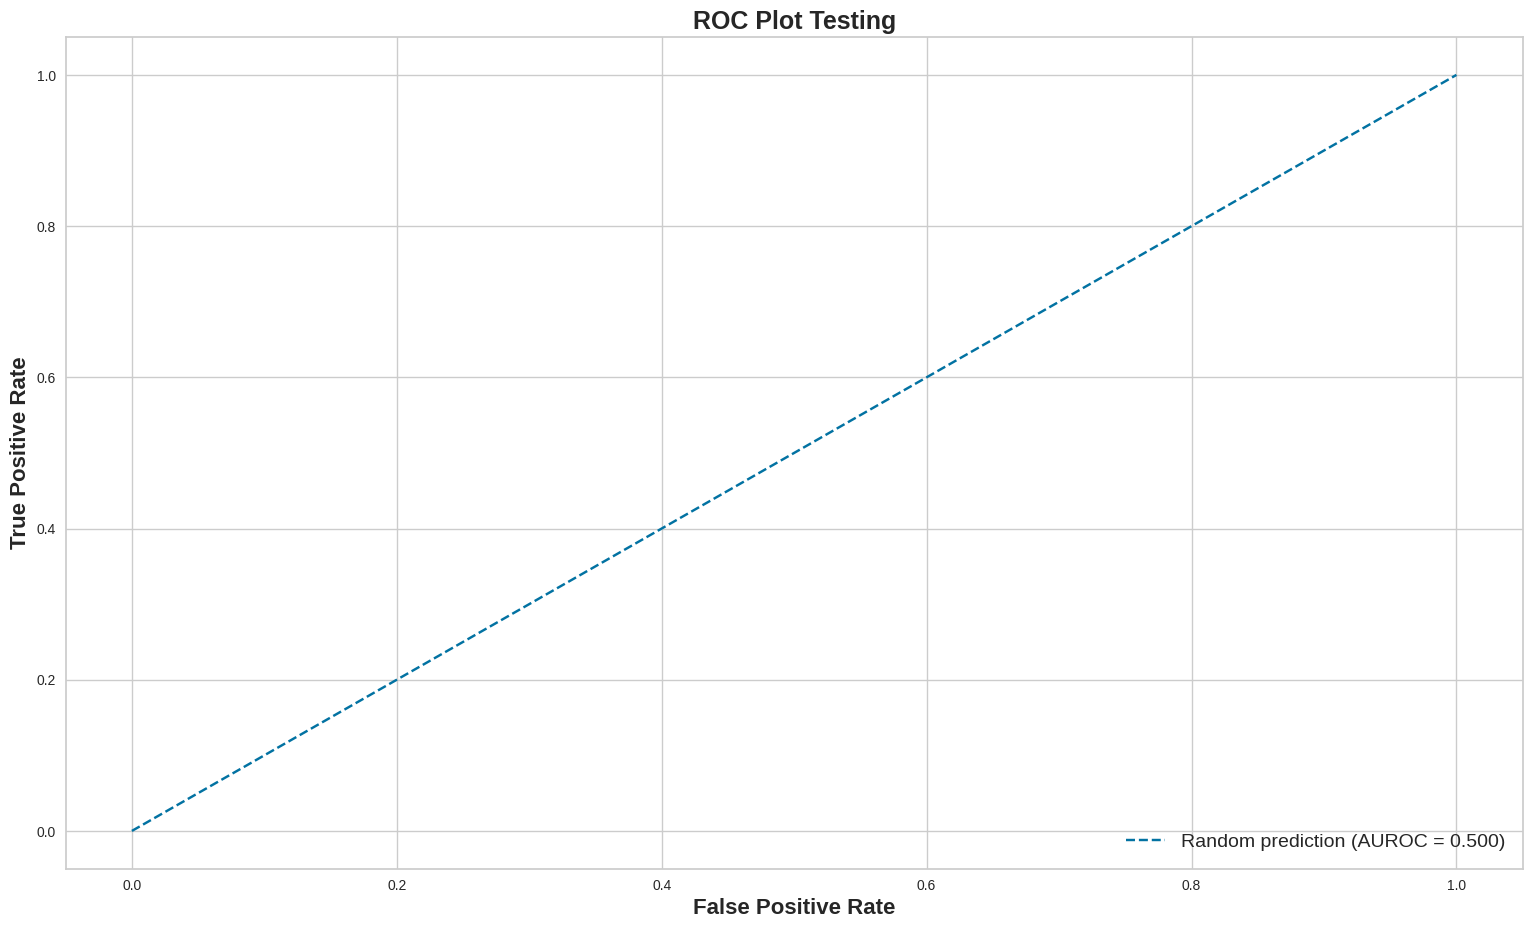

In [112]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_training.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])

ROC(mod,X_train,y_train,graph_feat)



---



***Testing ROC***<br>
Chosse the Models

In [113]:
new_keys_3=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=14, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, n_estimators=14, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, n_estimators=6, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)


Change  the given dictionary of graph feature for desire graph.

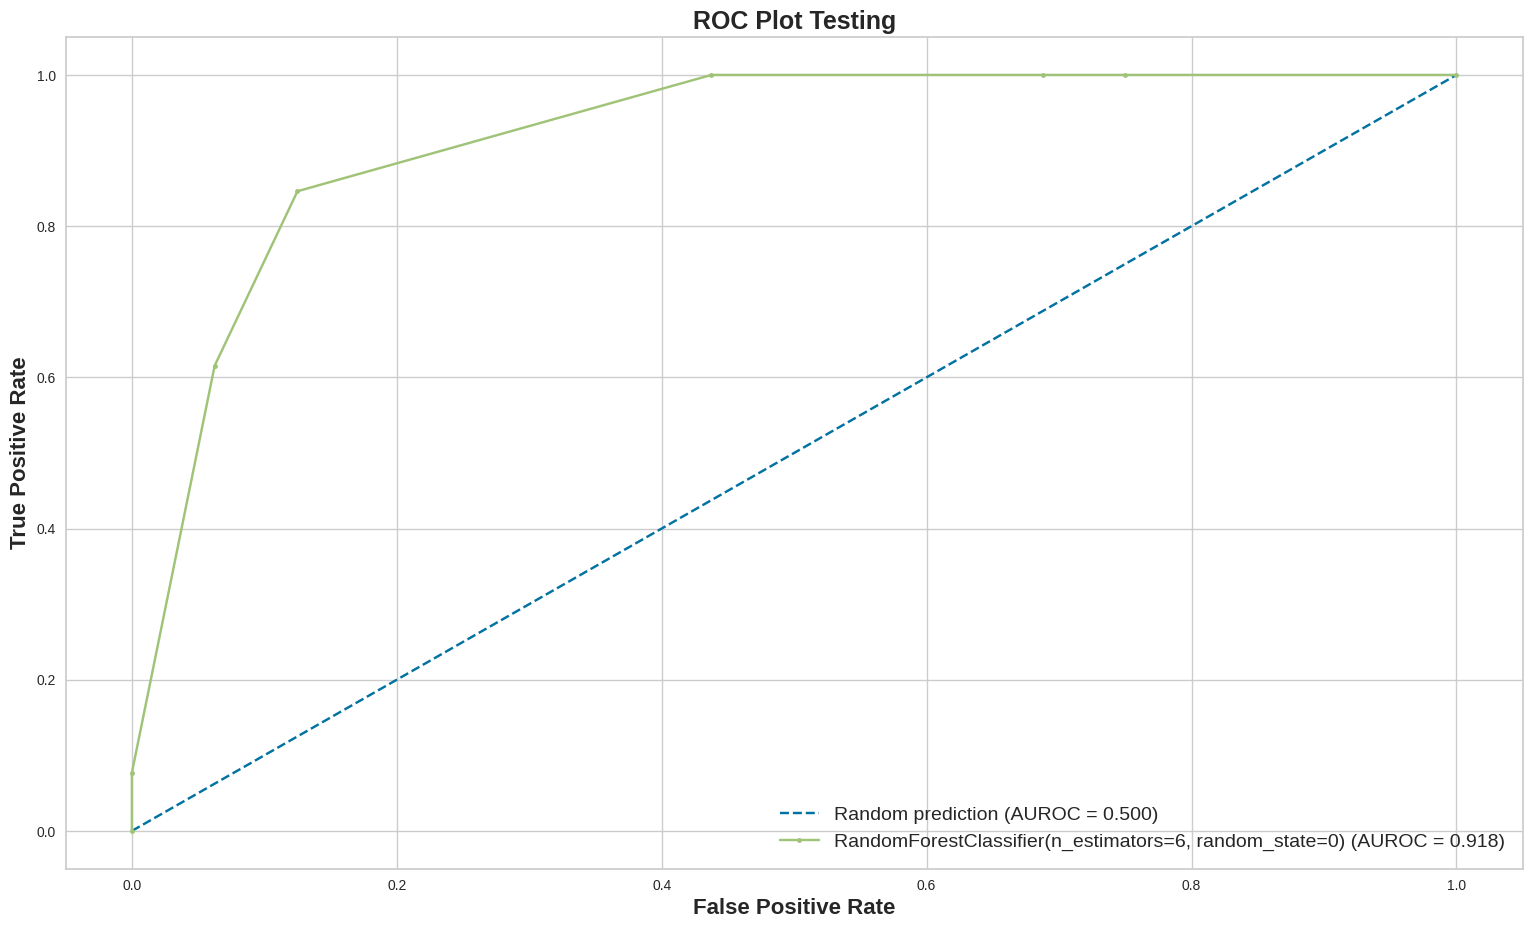

In [121]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

#Cross_val_score function

In [115]:
from sklearn.model_selection import cross_val_score

k=10
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  0.7586206896551724
AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 0.6455882352941177 (For 10 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=4, random_state=0)  -> Accuracy:  0.8275862068965517
AdaBoostClassifier(n_estimators=4, random_state=0)  -> AVG Accurecy After CV: 0.6404411764705882 (For 10 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  0.7931034482758621
GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 0.6952205882352941 (For 10 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=14, random_state=0)  -> Accuracy:  0.896551724137931
GradientBoostingClassifier(n_estimators=14, random_state=0)  -> AVG Accurecy After CV: 0.7386029411764705 (For 10 Fold)
----------------------

In [116]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [117]:
new_keys=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=14, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=4, n_estimators=14, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=8, n_estimators=6, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=5, random_state=0)', indent=False)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

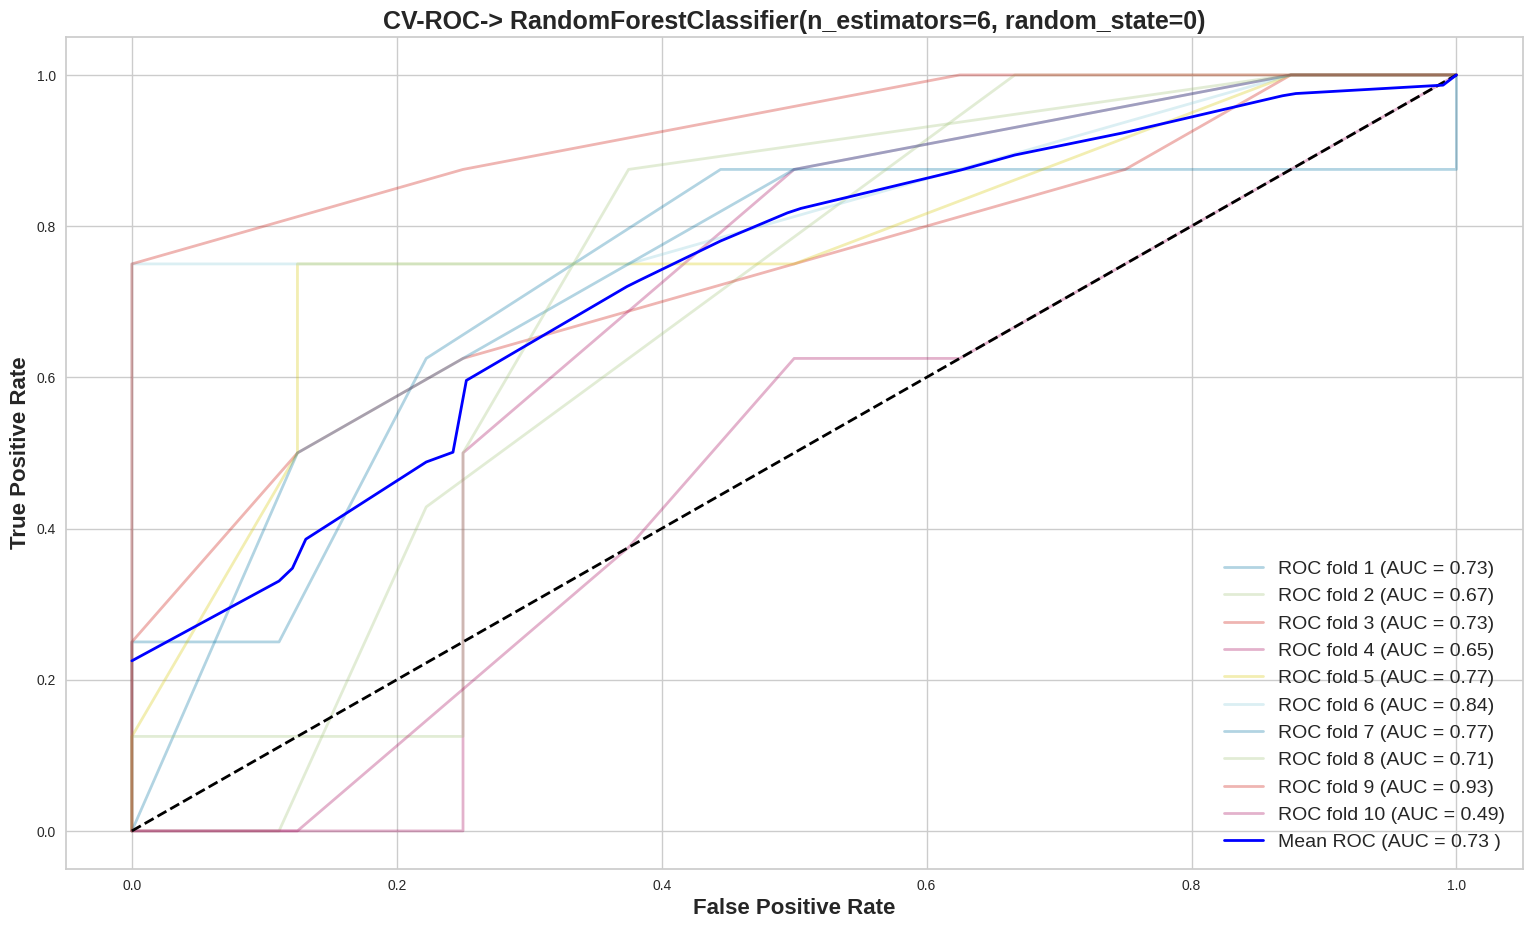

-----------------------------------------------------------------
-----------------------------------------------------------------


In [126]:
# run this cell after selecting

graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=10

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],10,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

#ANN Classification